In [6]:
import nltk
import gensim
import csv
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [7]:
# Read the CSV file into a pandas DataFrame
# Replace 'your_data.csv' with the path to your CSV file
data = pd.read_csv('400k_sampled_data.csv')

In [8]:
# Define a preprocessing function
def preprocess_text(text):
    stop_list = nltk.corpus.stopwords.words('english')
    stemmer = nltk.stem.porter.PorterStemmer()
    
    # Tokenize
    sent = nltk.word_tokenize(text)
    
     # We do not need this step below because the UICReviewData is already all in lowercase.
    sent = [w.lower() for w in sent]

    # Stop word removal. Optional!
    sent = [w for w in sent if w not in stop_list]

    # Stemming. Optional!
    sent = [stemmer.stem(w) for w in sent]
    
    # Stop word removal. Optional!
    # sent = [w for w in sent if w not in stop_list]
    
    
    
    return sent


In [9]:
# Apply the preprocessing function to the "tweet" column
data['preprocessed_tweet'] = data['tweet'].apply(preprocess_text)

data

,sentiment,tweet,preprocessed_tweet
0,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[@, chrishasboob, ahhh, hope, ok, !, !, !]"
1,0,"@misstoriblack cool , i have no tweet apps fo...","[@, misstoriblack, cool, ,, tweet, app, razr, 2]"
2,0,@TiannaChaos i know just family drama. its la...,"[@, tiannachao, know, famili, drama, ., lame.h..."
3,0,School email won't open and I have geography ...,"[school, email, wo, n't, open, geographi, stuf..."
4,0,upper airways problem,"[upper, airway, problem]"
...,...,...,...
399995,0,@brykins Splendid! I was told I looked like a ...,"[@, brykin, splendid, !, told, look, like, moo..."
399996,0,@herbadmother I'm so sorry! that IS sad,"[@, herbadmoth, 'm, sorri, !, sad]"
399997,1,@JosieStingray Sounds like Eddie Murphy is coo...,"[@, josiestingray, sound, like, eddi, murphi, ..."
399998,0,http://twitpic.com/4incl - The tiny Porter pla...,"[http, :, //twitpic.com/4incl, -, tini, porter..."


In [10]:
# Split the data into training and test data (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# We use the following list to store the sequence of sentence labels.
train_labels = []

# We use the following list to store the sentences, where each sentence itself is a list of words.
train_corpus = []

for index, row in train_data.iterrows():
    train_corpus.append(row['preprocessed_tweet'])
    train_labels.append(row['sentiment'])

In [12]:
# We use the following list to store the sequence of test sentence labels.
test_labels = []

# We use the following list to store the sentences, where each sentence itself is a list of words.
test_corpus = []

for index, row in test_data.iterrows():
    test_corpus.append(row['preprocessed_tweet'])
    test_labels.append(row['sentiment'])
    
print('Finished reading sentences from the training data file.')

Finished reading sentences from the training data file.


In [13]:
print("Amount of training data:", len(train_corpus))
print("Amount of testing data:", len(test_corpus))

Amount of training data: 320000
Amount of testing data: 80000


In [14]:
# Create a dictionary from the corpus.
dictionary = gensim.corpora.Dictionary(train_corpus)

# Store the labeled training data in the following list.
labeled_training_data = []
    
# Going through the two lists in parallel to create the labeled data set.
for (l, s) in zip(train_labels, train_corpus):

    # Convert the original sentence into a vector.
    vector = dictionary.doc2bow(s)
    
    # Create a dict object to store the document vector (in order to use NLTK's classifier later)
    sent_as_dict = {id:1 for (id, tf) in vector}
    
    # Add the labeled sentence to the labeled data set.
    labeled_training_data.append((sent_as_dict, l))
    
print('Finished preparing the training data.')


Finished preparing the training data.


In [15]:
# Training a classifier.
# Choose one of the following two classification algorithms to train a classifier.
classifier = nltk.NaiveBayesClassifier.train(labeled_training_data)
# classifier = nltk.MaxentClassifier.train(labeled_training_data)

print('Finished training Naive Bayes classifier.')

Finished training Naive Bayes classifier.


In [16]:
#Set iterations and the define classifer
numIterations = 10
algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]

#Train the classifier 
entclassifier = nltk.MaxentClassifier.train(labeled_training_data, algorithm, max_iter=numIterations)

print('Finished training Maxent classifier.')

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.501
             2          -0.69314        0.839
             3          -0.69314        0.839
             4          -0.69313        0.839
             5          -0.69313        0.839
             6          -0.69312        0.839
             7          -0.69312        0.839
             8          -0.69311        0.839
             9          -0.69311        0.839
         Final          -0.69311        0.839
Finished training Maxent classifier.


In [17]:
# Training data accuracy using naive bayes
print("Accuracy on training data using Naive Bayes: ", nltk.classify.accuracy(classifier, labeled_training_data))

Accuracy on training data using Naive Bayes:  0.862778125


In [18]:
# Training data accuracy using maxent
print("Accuracy on training data using Maxent: ", nltk.classify.accuracy(entclassifier, labeled_training_data))

Accuracy on training data using Maxent:  0.83945


### Testing/validating data

Usually if a document is used to train a classifier, then the trained classifier can most likely make a correct prediction on this training document. What is more challenging is for the classifier to predict the labels of unseen documents. To check how well our trained classifier can perform on unseen documents, we need to use some new documents.



Now, load and process the test data that requires classification

In [19]:
# Create a dictionary from the corpus.
v_dictionary = gensim.corpora.Dictionary(test_corpus)

# Store the labeled test data in the following list.
labeled_test_data = []
    
# Process the test set and predict labels using the trained classifier.
labeled_test_data = []
for s in test_corpus:
    v_vector = dictionary.doc2bow(s)
    v_sent_as_dict = {id: 1 for (id, tf) in v_vector}
    labeled_test_data.append(v_sent_as_dict)
    
print('Finished preparing the test data.')

Finished preparing the test data.


### Results after using Naives Bayes

In [20]:
# predict labels using the trained classifier.
predicted_labels = [classifier.classify(sent) for sent in labeled_test_data]

In [21]:
print("Accuracy: {:.2f}%".format(accuracy_score(test_labels, predicted_labels) * 100))
print("Precision: {:.2f}%".format(precision_score(test_labels, predicted_labels, average='weighted') * 100))
print("Recall: {:.2f}%".format(recall_score(test_labels, predicted_labels, average='weighted') * 100))
print("F1 Score: {:.2f}".format(f1_score(test_labels, predicted_labels, average='weighted') * 100))

Accuracy: 76.19%
Precision: 76.19%
Recall: 76.19%
F1 Score: 76.19


In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, predicted_labels, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### Results after using maxent

In [22]:
# predict labels using the trained classifier.
ent_predicted_labels = [entclassifier.classify(sent) for sent in labeled_test_data]

In [23]:
print("Accuracy: {:.2f}%".format(accuracy_score(test_labels, ent_predicted_labels) * 100))
print("Precision: {:.2f}%".format(precision_score(test_labels, ent_predicted_labels, average='weighted') * 100))
print("Recall: {:.2f}%".format(recall_score(test_labels, ent_predicted_labels, average='weighted') * 100))
print("F1 Score: {:.2f}".format(f1_score(test_labels, ent_predicted_labels, average='weighted') * 100))

Accuracy: 76.41%
Precision: 76.41%
Recall: 76.41%
F1 Score: 76.41


In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, ent_predicted_labels, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Confusion Matrix

In [24]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

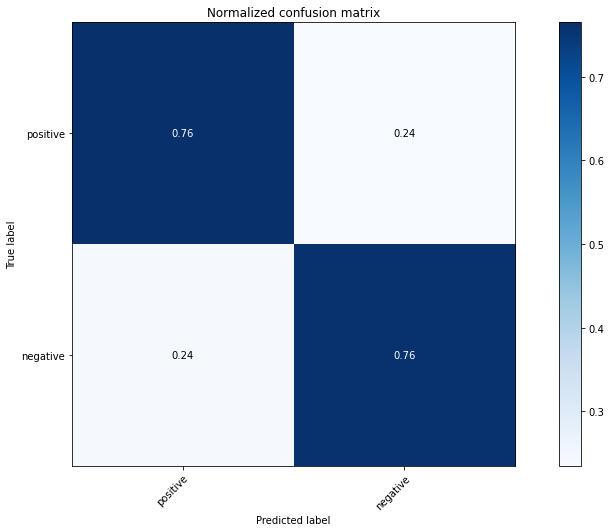

In [27]:
class_names = ['positive', 'negative']

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, predicted_labels, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Understand why is the accuracy low
through looking at what is incorrectly classified

In [21]:
len(labeled_test_data)

12000

In [32]:
check_train_df = pd.DataFrame(columns=['labeled','predicted'])
for i in range (len(labeled_training_data)):
    if labeled_training_data[i][1] != classifier.classify(labeled_training_data[0][0]):
        new_row = {'labeled': labeled_training_data[i][1], 'predicted': classifier.classify(labeled_training_data[0][0])}
         
        # insert the new row at the end of the DataFrame
        check_train_df = check_train_df.append(new_row, ignore_index=True)
check_train_df

,labeled,predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
159729,0,1
159730,0,1
159731,0,1
159732,0,1


In [28]:
check_df = pd.DataFrame(columns=['labeled','predicted'])
for i in range (len(labeled_test_data)):
    if labeled_test_data[i][1] != classifier.classify(labeled_test_data[0][0]):
        new_row = {'labeled': labeled_test_data[i][1], 'predicted': classifier.classify(labeled_test_data[0][0])}
         
        # insert the new row at the end of the DataFrame
        check_df = check_df.append(new_row, ignore_index=True)
check_df

,labeled,predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
39842,0,1
39843,0,1
39844,0,1
39845,0,1


In [31]:
check_df['labeled'].value_counts()

0    39847
Name: labeled, dtype: int64

## Prediction

In [70]:
stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()

# The variable below specifies which file is used for testing.
# You can modify this variable to use a different file for testing.
testing_file = './translated_dataframe.csv'

# We use the following list to store the sequence of sentence labels.
# t_labels = []

# We use the following list to store the sentences, where each sentence itself is a list of words.
t_corpus = []


with open(testing_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            df = pd.DataFrame(columns=['label', row[6], row[10], row[11]])
            line_count += 1
        else:
            # There are no labels for testing data
            # as this is what we are trying to predict
            # t_labels.append(row[0])
            
            # Tokenize the text.
            # t_sent = nltk.word_tokenize(row[6])
            
            t_sent = []
            
            string = row[11]
            removed_brackets_string = string.replace('[','').replace(']','')
            removed_quotes_string = removed_brackets_string.replace("'",'').replace("'",'')
            for word in removed_quotes_string.split(", "):
                t_sent.append(word)
            
            # We do not need this step below because the UICReviewData is already all in lowercase.
            pro_t_sent = [w.lower() for w in t_sent]

            # Stop word removal. Optional!
            # t_sent = [w for w in t_sent if w not in stop_list]

            # Stemming. Optional!
            pro_t_sent = [stemmer.stem(w) for w in pro_t_sent]
            
            new_row = {'tweet': row[6], 'translated_text': row[10], 'tokenized_text': t_sent,
                       'preprocessed_text': pro_t_sent}
            
        
            df.loc[line_count] = new_row
            
            
            # Store the sentence into the corpus.
            t_corpus.append(pro_t_sent)
            
            line_count += 1
#             print(f'Processing {line_count} lines.')
    print(f'Processed {line_count} lines.')


print('Finished reading sentences from the training data file.')

Column names are id, conversation_id, created_at, date, time, user_id, tweet, language, hashtags, reply_to, translated_text, tokenized_text
Processing 2 lines.
Processing 3 lines.
Processing 4 lines.
Processing 5 lines.
Processing 6 lines.
Processing 7 lines.
Processing 8 lines.
Processing 9 lines.
Processing 10 lines.
Processing 11 lines.
Processing 12 lines.
Processing 13 lines.
Processing 14 lines.
Processing 15 lines.
Processing 16 lines.
Processing 17 lines.
Processing 18 lines.
Processing 19 lines.
Processing 20 lines.
Processing 21 lines.
Processing 22 lines.
Processing 23 lines.
Processing 24 lines.
Processing 25 lines.
Processing 26 lines.
Processing 27 lines.
Processing 28 lines.
Processing 29 lines.
Processing 30 lines.
Processing 31 lines.
Processing 32 lines.
Processing 33 lines.
Processing 34 lines.
Processing 35 lines.
Processing 36 lines.
Processing 37 lines.
Processing 38 lines.
Processing 39 lines.
Processing 40 lines.
Processing 41 lines.
Processing 42 lines.
Process

Processing 474 lines.
Processing 475 lines.
Processing 476 lines.
Processing 477 lines.
Processing 478 lines.
Processing 479 lines.
Processing 480 lines.
Processing 481 lines.
Processing 482 lines.
Processing 483 lines.
Processing 484 lines.
Processing 485 lines.
Processing 486 lines.
Processing 487 lines.
Processing 488 lines.
Processing 489 lines.
Processing 490 lines.
Processing 491 lines.
Processing 492 lines.
Processing 493 lines.
Processing 494 lines.
Processing 495 lines.
Processing 496 lines.
Processing 497 lines.
Processing 498 lines.
Processing 499 lines.
Processing 500 lines.
Processing 501 lines.
Processing 502 lines.
Processing 503 lines.
Processing 504 lines.
Processing 505 lines.
Processing 506 lines.
Processing 507 lines.
Processing 508 lines.
Processing 509 lines.
Processing 510 lines.
Processing 511 lines.
Processing 512 lines.
Processing 513 lines.
Processing 514 lines.
Processing 515 lines.
Processing 516 lines.
Processing 517 lines.
Processing 518 lines.
Processing

Processing 954 lines.
Processing 955 lines.
Processing 956 lines.
Processing 957 lines.
Processing 958 lines.
Processing 959 lines.
Processing 960 lines.
Processing 961 lines.
Processing 962 lines.
Processing 963 lines.
Processing 964 lines.
Processing 965 lines.
Processing 966 lines.
Processing 967 lines.
Processing 968 lines.
Processing 969 lines.
Processing 970 lines.
Processing 971 lines.
Processing 972 lines.
Processing 973 lines.
Processing 974 lines.
Processing 975 lines.
Processing 976 lines.
Processing 977 lines.
Processing 978 lines.
Processing 979 lines.
Processing 980 lines.
Processing 981 lines.
Processing 982 lines.
Processing 983 lines.
Processing 984 lines.
Processing 985 lines.
Processing 986 lines.
Processing 987 lines.
Processing 988 lines.
Processing 989 lines.
Processing 990 lines.
Processing 991 lines.
Processing 992 lines.
Processing 993 lines.
Processing 994 lines.
Processing 995 lines.
Processing 996 lines.
Processing 997 lines.
Processing 998 lines.
Processing

Processing 1363 lines.
Processing 1364 lines.
Processing 1365 lines.
Processing 1366 lines.
Processing 1367 lines.
Processing 1368 lines.
Processing 1369 lines.
Processing 1370 lines.
Processing 1371 lines.
Processing 1372 lines.
Processing 1373 lines.
Processing 1374 lines.
Processing 1375 lines.
Processing 1376 lines.
Processing 1377 lines.
Processing 1378 lines.
Processing 1379 lines.
Processing 1380 lines.
Processing 1381 lines.
Processing 1382 lines.
Processing 1383 lines.
Processing 1384 lines.
Processing 1385 lines.
Processing 1386 lines.
Processing 1387 lines.
Processing 1388 lines.
Processing 1389 lines.
Processing 1390 lines.
Processing 1391 lines.
Processing 1392 lines.
Processing 1393 lines.
Processing 1394 lines.
Processing 1395 lines.
Processing 1396 lines.
Processing 1397 lines.
Processing 1398 lines.
Processing 1399 lines.
Processing 1400 lines.
Processing 1401 lines.
Processing 1402 lines.
Processing 1403 lines.
Processing 1404 lines.
Processing 1405 lines.
Processing 

Processing 1781 lines.
Processing 1782 lines.
Processing 1783 lines.
Processing 1784 lines.
Processing 1785 lines.
Processing 1786 lines.
Processing 1787 lines.
Processing 1788 lines.
Processing 1789 lines.
Processing 1790 lines.
Processing 1791 lines.
Processing 1792 lines.
Processing 1793 lines.
Processing 1794 lines.
Processing 1795 lines.
Processing 1796 lines.
Processing 1797 lines.
Processing 1798 lines.
Processing 1799 lines.
Processing 1800 lines.
Processing 1801 lines.
Processing 1802 lines.
Processing 1803 lines.
Processing 1804 lines.
Processing 1805 lines.
Processing 1806 lines.
Processing 1807 lines.
Processing 1808 lines.
Processing 1809 lines.
Processing 1810 lines.
Processing 1811 lines.
Processing 1812 lines.
Processing 1813 lines.
Processing 1814 lines.
Processing 1815 lines.
Processing 1816 lines.
Processing 1817 lines.
Processing 1818 lines.
Processing 1819 lines.
Processing 1820 lines.
Processing 1821 lines.
Processing 1822 lines.
Processing 1823 lines.
Processing 

Processing 2178 lines.
Processing 2179 lines.
Processing 2180 lines.
Processing 2181 lines.
Processing 2182 lines.
Processing 2183 lines.
Processing 2184 lines.
Processing 2185 lines.
Processing 2186 lines.
Processing 2187 lines.
Processing 2188 lines.
Processing 2189 lines.
Processing 2190 lines.
Processing 2191 lines.
Processing 2192 lines.
Processing 2193 lines.
Processing 2194 lines.
Processing 2195 lines.
Processing 2196 lines.
Processing 2197 lines.
Processing 2198 lines.
Processing 2199 lines.
Processing 2200 lines.
Processing 2201 lines.
Processing 2202 lines.
Processing 2203 lines.
Processing 2204 lines.
Processing 2205 lines.
Processing 2206 lines.
Processing 2207 lines.
Processing 2208 lines.
Processing 2209 lines.
Processing 2210 lines.
Processing 2211 lines.
Processing 2212 lines.
Processing 2213 lines.
Processing 2214 lines.
Processing 2215 lines.
Processing 2216 lines.
Processing 2217 lines.
Processing 2218 lines.
Processing 2219 lines.
Processing 2220 lines.
Processing 

Processing 2588 lines.
Processing 2589 lines.
Processing 2590 lines.
Processing 2591 lines.
Processing 2592 lines.
Processing 2593 lines.
Processing 2594 lines.
Processing 2595 lines.
Processing 2596 lines.
Processing 2597 lines.
Processing 2598 lines.
Processing 2599 lines.
Processing 2600 lines.
Processing 2601 lines.
Processing 2602 lines.
Processing 2603 lines.
Processing 2604 lines.
Processing 2605 lines.
Processing 2606 lines.
Processing 2607 lines.
Processing 2608 lines.
Processing 2609 lines.
Processing 2610 lines.
Processing 2611 lines.
Processing 2612 lines.
Processing 2613 lines.
Processing 2614 lines.
Processing 2615 lines.
Processing 2616 lines.
Processing 2617 lines.
Processing 2618 lines.
Processing 2619 lines.
Processing 2620 lines.
Processing 2621 lines.
Processing 2622 lines.
Processing 2623 lines.
Processing 2624 lines.
Processing 2625 lines.
Processing 2626 lines.
Processing 2627 lines.
Processing 2628 lines.
Processing 2629 lines.
Processing 2630 lines.
Processing 

Processing 2968 lines.
Processing 2969 lines.
Processing 2970 lines.
Processing 2971 lines.
Processing 2972 lines.
Processing 2973 lines.
Processing 2974 lines.
Processing 2975 lines.
Processing 2976 lines.
Processing 2977 lines.
Processing 2978 lines.
Processing 2979 lines.
Processing 2980 lines.
Processing 2981 lines.
Processing 2982 lines.
Processing 2983 lines.
Processing 2984 lines.
Processing 2985 lines.
Processing 2986 lines.
Processing 2987 lines.
Processing 2988 lines.
Processing 2989 lines.
Processing 2990 lines.
Processing 2991 lines.
Processing 2992 lines.
Processing 2993 lines.
Processing 2994 lines.
Processing 2995 lines.
Processing 2996 lines.
Processing 2997 lines.
Processing 2998 lines.
Processing 2999 lines.
Processing 3000 lines.
Processing 3001 lines.
Processing 3002 lines.
Processing 3003 lines.
Processing 3004 lines.
Processing 3005 lines.
Processing 3006 lines.
Processing 3007 lines.
Processing 3008 lines.
Processing 3009 lines.
Processing 3010 lines.
Processing 

Processing 3361 lines.
Processing 3362 lines.
Processing 3363 lines.
Processing 3364 lines.
Processing 3365 lines.
Processing 3366 lines.
Processing 3367 lines.
Processing 3368 lines.
Processing 3369 lines.
Processing 3370 lines.
Processing 3371 lines.
Processing 3372 lines.
Processing 3373 lines.
Processing 3374 lines.
Processing 3375 lines.
Processing 3376 lines.
Processing 3377 lines.
Processing 3378 lines.
Processing 3379 lines.
Processing 3380 lines.
Processing 3381 lines.
Processing 3382 lines.
Processing 3383 lines.
Processing 3384 lines.
Processing 3385 lines.
Processing 3386 lines.
Processing 3387 lines.
Processing 3388 lines.
Processing 3389 lines.
Processing 3390 lines.
Processing 3391 lines.
Processing 3392 lines.
Processing 3393 lines.
Processing 3394 lines.
Processing 3395 lines.
Processing 3396 lines.
Processing 3397 lines.
Processing 3398 lines.
Processing 3399 lines.
Processing 3400 lines.
Processing 3401 lines.
Processing 3402 lines.
Processing 3403 lines.
Processing 

Processing 3733 lines.
Processing 3734 lines.
Processing 3735 lines.
Processing 3736 lines.
Processing 3737 lines.
Processing 3738 lines.
Processing 3739 lines.
Processing 3740 lines.
Processing 3741 lines.
Processing 3742 lines.
Processing 3743 lines.
Processing 3744 lines.
Processing 3745 lines.
Processing 3746 lines.
Processing 3747 lines.
Processing 3748 lines.
Processing 3749 lines.
Processing 3750 lines.
Processing 3751 lines.
Processing 3752 lines.
Processing 3753 lines.
Processing 3754 lines.
Processing 3755 lines.
Processing 3756 lines.
Processing 3757 lines.
Processing 3758 lines.
Processing 3759 lines.
Processing 3760 lines.
Processing 3761 lines.
Processing 3762 lines.
Processing 3763 lines.
Processing 3764 lines.
Processing 3765 lines.
Processing 3766 lines.
Processing 3767 lines.
Processing 3768 lines.
Processing 3769 lines.
Processing 3770 lines.
Processing 3771 lines.
Processing 3772 lines.
Processing 3773 lines.
Processing 3774 lines.
Processing 3775 lines.
Processing 

Processing 4138 lines.
Processing 4139 lines.
Processing 4140 lines.
Processing 4141 lines.
Processing 4142 lines.
Processing 4143 lines.
Processing 4144 lines.
Processing 4145 lines.
Processing 4146 lines.
Processing 4147 lines.
Processing 4148 lines.
Processing 4149 lines.
Processing 4150 lines.
Processing 4151 lines.
Processing 4152 lines.
Processing 4153 lines.
Processing 4154 lines.
Processing 4155 lines.
Processing 4156 lines.
Processing 4157 lines.
Processing 4158 lines.
Processing 4159 lines.
Processing 4160 lines.
Processing 4161 lines.
Processing 4162 lines.
Processing 4163 lines.
Processing 4164 lines.
Processing 4165 lines.
Processing 4166 lines.
Processing 4167 lines.
Processing 4168 lines.
Processing 4169 lines.
Processing 4170 lines.
Processing 4171 lines.
Processing 4172 lines.
Processing 4173 lines.
Processing 4174 lines.
Processing 4175 lines.
Processing 4176 lines.
Processing 4177 lines.
Processing 4178 lines.
Processing 4179 lines.
Processing 4180 lines.
Processing 

Processing 4507 lines.
Processing 4508 lines.
Processing 4509 lines.
Processing 4510 lines.
Processing 4511 lines.
Processing 4512 lines.
Processing 4513 lines.
Processing 4514 lines.
Processing 4515 lines.
Processing 4516 lines.
Processing 4517 lines.
Processing 4518 lines.
Processing 4519 lines.
Processing 4520 lines.
Processing 4521 lines.
Processing 4522 lines.
Processing 4523 lines.
Processing 4524 lines.
Processing 4525 lines.
Processing 4526 lines.
Processing 4527 lines.
Processing 4528 lines.
Processing 4529 lines.
Processing 4530 lines.
Processing 4531 lines.
Processing 4532 lines.
Processing 4533 lines.
Processing 4534 lines.
Processing 4535 lines.
Processing 4536 lines.
Processing 4537 lines.
Processing 4538 lines.
Processing 4539 lines.
Processing 4540 lines.
Processing 4541 lines.
Processing 4542 lines.
Processing 4543 lines.
Processing 4544 lines.
Processing 4545 lines.
Processing 4546 lines.
Processing 4547 lines.
Processing 4548 lines.
Processing 4549 lines.
Processing 

Processing 4892 lines.
Processing 4893 lines.
Processing 4894 lines.
Processing 4895 lines.
Processing 4896 lines.
Processing 4897 lines.
Processing 4898 lines.
Processing 4899 lines.
Processing 4900 lines.
Processing 4901 lines.
Processing 4902 lines.
Processing 4903 lines.
Processing 4904 lines.
Processing 4905 lines.
Processing 4906 lines.
Processing 4907 lines.
Processing 4908 lines.
Processing 4909 lines.
Processing 4910 lines.
Processing 4911 lines.
Processing 4912 lines.
Processing 4913 lines.
Processing 4914 lines.
Processing 4915 lines.
Processing 4916 lines.
Processing 4917 lines.
Processing 4918 lines.
Processing 4919 lines.
Processing 4920 lines.
Processing 4921 lines.
Processing 4922 lines.
Processing 4923 lines.
Processing 4924 lines.
Processing 4925 lines.
Processing 4926 lines.
Processing 4927 lines.
Processing 4928 lines.
Processing 4929 lines.
Processing 4930 lines.
Processing 4931 lines.
Processing 4932 lines.
Processing 4933 lines.
Processing 4934 lines.
Processing 

Processing 5265 lines.
Processing 5266 lines.
Processing 5267 lines.
Processing 5268 lines.
Processing 5269 lines.
Processing 5270 lines.
Processing 5271 lines.
Processing 5272 lines.
Processing 5273 lines.
Processing 5274 lines.
Processing 5275 lines.
Processing 5276 lines.
Processing 5277 lines.
Processing 5278 lines.
Processing 5279 lines.
Processing 5280 lines.
Processing 5281 lines.
Processing 5282 lines.
Processing 5283 lines.
Processing 5284 lines.
Processing 5285 lines.
Processing 5286 lines.
Processing 5287 lines.
Processing 5288 lines.
Processing 5289 lines.
Processing 5290 lines.
Processing 5291 lines.
Processing 5292 lines.
Processing 5293 lines.
Processing 5294 lines.
Processing 5295 lines.
Processing 5296 lines.
Processing 5297 lines.
Processing 5298 lines.
Processing 5299 lines.
Processing 5300 lines.
Processing 5301 lines.
Processing 5302 lines.
Processing 5303 lines.
Processing 5304 lines.
Processing 5305 lines.
Processing 5306 lines.
Processing 5307 lines.
Processing 

Processing 5659 lines.
Processing 5660 lines.
Processing 5661 lines.
Processing 5662 lines.
Processing 5663 lines.
Processing 5664 lines.
Processing 5665 lines.
Processing 5666 lines.
Processing 5667 lines.
Processing 5668 lines.
Processing 5669 lines.
Processing 5670 lines.
Processing 5671 lines.
Processing 5672 lines.
Processing 5673 lines.
Processing 5674 lines.
Processing 5675 lines.
Processing 5676 lines.
Processing 5677 lines.
Processing 5678 lines.
Processing 5679 lines.
Processing 5680 lines.
Processing 5681 lines.
Processing 5682 lines.
Processing 5683 lines.
Processing 5684 lines.
Processing 5685 lines.
Processing 5686 lines.
Processing 5687 lines.
Processing 5688 lines.
Processing 5689 lines.
Processing 5690 lines.
Processing 5691 lines.
Processing 5692 lines.
Processing 5693 lines.
Processing 5694 lines.
Processing 5695 lines.
Processing 5696 lines.
Processing 5697 lines.
Processing 5698 lines.
Processing 5699 lines.
Processing 5700 lines.
Processing 5701 lines.
Processing 

Processing 6399 lines.
Processing 6400 lines.
Processing 6401 lines.
Processing 6402 lines.
Processing 6403 lines.
Processing 6404 lines.
Processing 6405 lines.
Processing 6406 lines.
Processing 6407 lines.
Processing 6408 lines.
Processing 6409 lines.
Processing 6410 lines.
Processing 6411 lines.
Processing 6412 lines.
Processing 6413 lines.
Processing 6414 lines.
Processing 6415 lines.
Processing 6416 lines.
Processing 6417 lines.
Processing 6418 lines.
Processing 6419 lines.
Processing 6420 lines.
Processing 6421 lines.
Processing 6422 lines.
Processing 6423 lines.
Processing 6424 lines.
Processing 6425 lines.
Processing 6426 lines.
Processing 6427 lines.
Processing 6428 lines.
Processing 6429 lines.
Processing 6430 lines.
Processing 6431 lines.
Processing 6432 lines.
Processing 6433 lines.
Processing 6434 lines.
Processing 6435 lines.
Processing 6436 lines.
Processing 6437 lines.
Processing 6438 lines.
Processing 6439 lines.
Processing 6440 lines.
Processing 6441 lines.
Processing 

Processing 6771 lines.
Processing 6772 lines.
Processing 6773 lines.
Processing 6774 lines.
Processing 6775 lines.
Processing 6776 lines.
Processing 6777 lines.
Processing 6778 lines.
Processing 6779 lines.
Processing 6780 lines.
Processing 6781 lines.
Processing 6782 lines.
Processing 6783 lines.
Processing 6784 lines.
Processing 6785 lines.
Processing 6786 lines.
Processing 6787 lines.
Processing 6788 lines.
Processing 6789 lines.
Processing 6790 lines.
Processing 6791 lines.
Processing 6792 lines.
Processing 6793 lines.
Processing 6794 lines.
Processing 6795 lines.
Processing 6796 lines.
Processing 6797 lines.
Processing 6798 lines.
Processing 6799 lines.
Processing 6800 lines.
Processing 6801 lines.
Processing 6802 lines.
Processing 6803 lines.
Processing 6804 lines.
Processing 6805 lines.
Processing 6806 lines.
Processing 6807 lines.
Processing 6808 lines.
Processing 6809 lines.
Processing 6810 lines.
Processing 6811 lines.
Processing 6812 lines.
Processing 6813 lines.
Processing 

Processing 7153 lines.
Processing 7154 lines.
Processing 7155 lines.
Processing 7156 lines.
Processing 7157 lines.
Processing 7158 lines.
Processing 7159 lines.
Processing 7160 lines.
Processing 7161 lines.
Processing 7162 lines.
Processing 7163 lines.
Processing 7164 lines.
Processing 7165 lines.
Processing 7166 lines.
Processing 7167 lines.
Processing 7168 lines.
Processing 7169 lines.
Processing 7170 lines.
Processing 7171 lines.
Processing 7172 lines.
Processing 7173 lines.
Processing 7174 lines.
Processing 7175 lines.
Processing 7176 lines.
Processing 7177 lines.
Processing 7178 lines.
Processing 7179 lines.
Processing 7180 lines.
Processing 7181 lines.
Processing 7182 lines.
Processing 7183 lines.
Processing 7184 lines.
Processing 7185 lines.
Processing 7186 lines.
Processing 7187 lines.
Processing 7188 lines.
Processing 7189 lines.
Processing 7190 lines.
Processing 7191 lines.
Processing 7192 lines.
Processing 7193 lines.
Processing 7194 lines.
Processing 7195 lines.
Processing 

Processing 7516 lines.
Processing 7517 lines.
Processing 7518 lines.
Processing 7519 lines.
Processing 7520 lines.
Processing 7521 lines.
Processing 7522 lines.
Processing 7523 lines.
Processing 7524 lines.
Processing 7525 lines.
Processing 7526 lines.
Processing 7527 lines.
Processing 7528 lines.
Processing 7529 lines.
Processing 7530 lines.
Processing 7531 lines.
Processing 7532 lines.
Processing 7533 lines.
Processing 7534 lines.
Processing 7535 lines.
Processing 7536 lines.
Processing 7537 lines.
Processing 7538 lines.
Processing 7539 lines.
Processing 7540 lines.
Processing 7541 lines.
Processing 7542 lines.
Processing 7543 lines.
Processing 7544 lines.
Processing 7545 lines.
Processing 7546 lines.
Processing 7547 lines.
Processing 7548 lines.
Processing 7549 lines.
Processing 7550 lines.
Processing 7551 lines.
Processing 7552 lines.
Processing 7553 lines.
Processing 7554 lines.
Processing 7555 lines.
Processing 7556 lines.
Processing 7557 lines.
Processing 7558 lines.
Processing 

Processing 7877 lines.
Processing 7878 lines.
Processing 7879 lines.
Processing 7880 lines.
Processing 7881 lines.
Processing 7882 lines.
Processing 7883 lines.
Processing 7884 lines.
Processing 7885 lines.
Processing 7886 lines.
Processing 7887 lines.
Processing 7888 lines.
Processing 7889 lines.
Processing 7890 lines.
Processing 7891 lines.
Processing 7892 lines.
Processing 7893 lines.
Processing 7894 lines.
Processing 7895 lines.
Processing 7896 lines.
Processing 7897 lines.
Processing 7898 lines.
Processing 7899 lines.
Processing 7900 lines.
Processing 7901 lines.
Processing 7902 lines.
Processing 7903 lines.
Processing 7904 lines.
Processing 7905 lines.
Processing 7906 lines.
Processing 7907 lines.
Processing 7908 lines.
Processing 7909 lines.
Processing 7910 lines.
Processing 7911 lines.
Processing 7912 lines.
Processing 7913 lines.
Processing 7914 lines.
Processing 7915 lines.
Processing 7916 lines.
Processing 7917 lines.
Processing 7918 lines.
Processing 7919 lines.
Processing 

Processing 8255 lines.
Processing 8256 lines.
Processing 8257 lines.
Processing 8258 lines.
Processing 8259 lines.
Processing 8260 lines.
Processing 8261 lines.
Processing 8262 lines.
Processing 8263 lines.
Processing 8264 lines.
Processing 8265 lines.
Processing 8266 lines.
Processing 8267 lines.
Processing 8268 lines.
Processing 8269 lines.
Processing 8270 lines.
Processing 8271 lines.
Processing 8272 lines.
Processing 8273 lines.
Processing 8274 lines.
Processing 8275 lines.
Processing 8276 lines.
Processing 8277 lines.
Processing 8278 lines.
Processing 8279 lines.
Processing 8280 lines.
Processing 8281 lines.
Processing 8282 lines.
Processing 8283 lines.
Processing 8284 lines.
Processing 8285 lines.
Processing 8286 lines.
Processing 8287 lines.
Processing 8288 lines.
Processing 8289 lines.
Processing 8290 lines.
Processing 8291 lines.
Processing 8292 lines.
Processing 8293 lines.
Processing 8294 lines.
Processing 8295 lines.
Processing 8296 lines.
Processing 8297 lines.
Processing 

Processing 8618 lines.
Processing 8619 lines.
Processing 8620 lines.
Processing 8621 lines.
Processing 8622 lines.
Processing 8623 lines.
Processing 8624 lines.
Processing 8625 lines.
Processing 8626 lines.
Processing 8627 lines.
Processing 8628 lines.
Processing 8629 lines.
Processing 8630 lines.
Processing 8631 lines.
Processing 8632 lines.
Processing 8633 lines.
Processing 8634 lines.
Processing 8635 lines.
Processing 8636 lines.
Processing 8637 lines.
Processing 8638 lines.
Processing 8639 lines.
Processing 8640 lines.
Processing 8641 lines.
Processing 8642 lines.
Processing 8643 lines.
Processing 8644 lines.
Processing 8645 lines.
Processing 8646 lines.
Processing 8647 lines.
Processing 8648 lines.
Processing 8649 lines.
Processing 8650 lines.
Processing 8651 lines.
Processing 8652 lines.
Processing 8653 lines.
Processing 8654 lines.
Processing 8655 lines.
Processing 8656 lines.
Processing 8657 lines.
Processing 8658 lines.
Processing 8659 lines.
Processing 8660 lines.
Processing 

Processing 8994 lines.
Processing 8995 lines.
Processing 8996 lines.
Processing 8997 lines.
Processing 8998 lines.
Processing 8999 lines.
Processing 9000 lines.
Processing 9001 lines.
Processing 9002 lines.
Processing 9003 lines.
Processing 9004 lines.
Processing 9005 lines.
Processing 9006 lines.
Processing 9007 lines.
Processing 9008 lines.
Processing 9009 lines.
Processing 9010 lines.
Processing 9011 lines.
Processing 9012 lines.
Processing 9013 lines.
Processing 9014 lines.
Processing 9015 lines.
Processing 9016 lines.
Processing 9017 lines.
Processing 9018 lines.
Processing 9019 lines.
Processing 9020 lines.
Processing 9021 lines.
Processing 9022 lines.
Processing 9023 lines.
Processing 9024 lines.
Processing 9025 lines.
Processing 9026 lines.
Processing 9027 lines.
Processing 9028 lines.
Processing 9029 lines.
Processing 9030 lines.
Processing 9031 lines.
Processing 9032 lines.
Processing 9033 lines.
Processing 9034 lines.
Processing 9035 lines.
Processing 9036 lines.
Processing 

Processing 9373 lines.
Processing 9374 lines.
Processing 9375 lines.
Processing 9376 lines.
Processing 9377 lines.
Processing 9378 lines.
Processing 9379 lines.
Processing 9380 lines.
Processing 9381 lines.
Processing 9382 lines.
Processing 9383 lines.
Processing 9384 lines.
Processing 9385 lines.
Processing 9386 lines.
Processing 9387 lines.
Processing 9388 lines.
Processing 9389 lines.
Processing 9390 lines.
Processing 9391 lines.
Processing 9392 lines.
Processing 9393 lines.
Processing 9394 lines.
Processing 9395 lines.
Processing 9396 lines.
Processing 9397 lines.
Processing 9398 lines.
Processing 9399 lines.
Processing 9400 lines.
Processing 9401 lines.
Processing 9402 lines.
Processing 9403 lines.
Processing 9404 lines.
Processing 9405 lines.
Processing 9406 lines.
Processing 9407 lines.
Processing 9408 lines.
Processing 9409 lines.
Processing 9410 lines.
Processing 9411 lines.
Processing 9412 lines.
Processing 9413 lines.
Processing 9414 lines.
Processing 9415 lines.
Processing 

Processing 9735 lines.
Processing 9736 lines.
Processing 9737 lines.
Processing 9738 lines.
Processing 9739 lines.
Processing 9740 lines.
Processing 9741 lines.
Processing 9742 lines.
Processing 9743 lines.
Processing 9744 lines.
Processing 9745 lines.
Processing 9746 lines.
Processing 9747 lines.
Processing 9748 lines.
Processing 9749 lines.
Processing 9750 lines.
Processing 9751 lines.
Processing 9752 lines.
Processing 9753 lines.
Processing 9754 lines.
Processing 9755 lines.
Processing 9756 lines.
Processing 9757 lines.
Processing 9758 lines.
Processing 9759 lines.
Processing 9760 lines.
Processing 9761 lines.
Processing 9762 lines.
Processing 9763 lines.
Processing 9764 lines.
Processing 9765 lines.
Processing 9766 lines.
Processing 9767 lines.
Processing 9768 lines.
Processing 9769 lines.
Processing 9770 lines.
Processing 9771 lines.
Processing 9772 lines.
Processing 9773 lines.
Processing 9774 lines.
Processing 9775 lines.
Processing 9776 lines.
Processing 9777 lines.
Processing 

Processing 10105 lines.
Processing 10106 lines.
Processing 10107 lines.
Processing 10108 lines.
Processing 10109 lines.
Processing 10110 lines.
Processing 10111 lines.
Processing 10112 lines.
Processing 10113 lines.
Processing 10114 lines.
Processing 10115 lines.
Processing 10116 lines.
Processing 10117 lines.
Processing 10118 lines.
Processing 10119 lines.
Processing 10120 lines.
Processing 10121 lines.
Processing 10122 lines.
Processing 10123 lines.
Processing 10124 lines.
Processing 10125 lines.
Processing 10126 lines.
Processing 10127 lines.
Processing 10128 lines.
Processing 10129 lines.
Processing 10130 lines.
Processing 10131 lines.
Processing 10132 lines.
Processing 10133 lines.
Processing 10134 lines.
Processing 10135 lines.
Processing 10136 lines.
Processing 10137 lines.
Processing 10138 lines.
Processing 10139 lines.
Processing 10140 lines.
Processing 10141 lines.
Processing 10142 lines.
Processing 10143 lines.
Processing 10144 lines.
Processing 10145 lines.
Processing 10146

Processing 10453 lines.
Processing 10454 lines.
Processing 10455 lines.
Processing 10456 lines.
Processing 10457 lines.
Processing 10458 lines.
Processing 10459 lines.
Processing 10460 lines.
Processing 10461 lines.
Processing 10462 lines.
Processing 10463 lines.
Processing 10464 lines.
Processing 10465 lines.
Processing 10466 lines.
Processing 10467 lines.
Processing 10468 lines.
Processing 10469 lines.
Processing 10470 lines.
Processing 10471 lines.
Processing 10472 lines.
Processing 10473 lines.
Processing 10474 lines.
Processing 10475 lines.
Processing 10476 lines.
Processing 10477 lines.
Processing 10478 lines.
Processing 10479 lines.
Processing 10480 lines.
Processing 10481 lines.
Processing 10482 lines.
Processing 10483 lines.
Processing 10484 lines.
Processing 10485 lines.
Processing 10486 lines.
Processing 10487 lines.
Processing 10488 lines.
Processing 10489 lines.
Processing 10490 lines.
Processing 10491 lines.
Processing 10492 lines.
Processing 10493 lines.
Processing 10494

Processing 10797 lines.
Processing 10798 lines.
Processing 10799 lines.
Processing 10800 lines.
Processing 10801 lines.
Processing 10802 lines.
Processing 10803 lines.
Processing 10804 lines.
Processing 10805 lines.
Processing 10806 lines.
Processing 10807 lines.
Processing 10808 lines.
Processing 10809 lines.
Processing 10810 lines.
Processing 10811 lines.
Processing 10812 lines.
Processing 10813 lines.
Processing 10814 lines.
Processing 10815 lines.
Processing 10816 lines.
Processing 10817 lines.
Processing 10818 lines.
Processing 10819 lines.
Processing 10820 lines.
Processing 10821 lines.
Processing 10822 lines.
Processing 10823 lines.
Processing 10824 lines.
Processing 10825 lines.
Processing 10826 lines.
Processing 10827 lines.
Processing 10828 lines.
Processing 10829 lines.
Processing 10830 lines.
Processing 10831 lines.
Processing 10832 lines.
Processing 10833 lines.
Processing 10834 lines.
Processing 10835 lines.
Processing 10836 lines.
Processing 10837 lines.
Processing 10838

Processing 11141 lines.
Processing 11142 lines.
Processing 11143 lines.
Processing 11144 lines.
Processing 11145 lines.
Processing 11146 lines.
Processing 11147 lines.
Processing 11148 lines.
Processing 11149 lines.
Processing 11150 lines.
Processing 11151 lines.
Processing 11152 lines.
Processing 11153 lines.
Processing 11154 lines.
Processing 11155 lines.
Processing 11156 lines.
Processing 11157 lines.
Processing 11158 lines.
Processing 11159 lines.
Processing 11160 lines.
Processing 11161 lines.
Processing 11162 lines.
Processing 11163 lines.
Processing 11164 lines.
Processing 11165 lines.
Processing 11166 lines.
Processing 11167 lines.
Processing 11168 lines.
Processing 11169 lines.
Processing 11170 lines.
Processing 11171 lines.
Processing 11172 lines.
Processing 11173 lines.
Processing 11174 lines.
Processing 11175 lines.
Processing 11176 lines.
Processing 11177 lines.
Processing 11178 lines.
Processing 11179 lines.
Processing 11180 lines.
Processing 11181 lines.
Processing 11182

Processing 11492 lines.
Processing 11493 lines.
Processing 11494 lines.
Processing 11495 lines.
Processing 11496 lines.
Processing 11497 lines.
Processing 11498 lines.
Processing 11499 lines.
Processing 11500 lines.
Processing 11501 lines.
Processing 11502 lines.
Processing 11503 lines.
Processing 11504 lines.
Processing 11505 lines.
Processing 11506 lines.
Processing 11507 lines.
Processing 11508 lines.
Processing 11509 lines.
Processing 11510 lines.
Processing 11511 lines.
Processing 11512 lines.
Processing 11513 lines.
Processing 11514 lines.
Processing 11515 lines.
Processing 11516 lines.
Processing 11517 lines.
Processing 11518 lines.
Processing 11519 lines.
Processing 11520 lines.
Processing 11521 lines.
Processing 11522 lines.
Processing 11523 lines.
Processing 11524 lines.
Processing 11525 lines.
Processing 11526 lines.
Processing 11527 lines.
Processing 11528 lines.
Processing 11529 lines.
Processing 11530 lines.
Processing 11531 lines.
Processing 11532 lines.
Processing 11533

Processing 11838 lines.
Processing 11839 lines.
Processing 11840 lines.
Processing 11841 lines.
Processing 11842 lines.
Processing 11843 lines.
Processing 11844 lines.
Processing 11845 lines.
Processing 11846 lines.
Processing 11847 lines.
Processing 11848 lines.
Processing 11849 lines.
Processing 11850 lines.
Processing 11851 lines.
Processing 11852 lines.
Processing 11853 lines.
Processing 11854 lines.
Processing 11855 lines.
Processing 11856 lines.
Processing 11857 lines.
Processing 11858 lines.
Processing 11859 lines.
Processing 11860 lines.
Processing 11861 lines.
Processing 11862 lines.
Processing 11863 lines.
Processing 11864 lines.
Processing 11865 lines.
Processing 11866 lines.
Processing 11867 lines.
Processing 11868 lines.
Processing 11869 lines.
Processing 11870 lines.
Processing 11871 lines.
Processing 11872 lines.
Processing 11873 lines.
Processing 11874 lines.
Processing 11875 lines.
Processing 11876 lines.
Processing 11877 lines.
Processing 11878 lines.
Processing 11879

Processing 12196 lines.
Processing 12197 lines.
Processing 12198 lines.
Processing 12199 lines.
Processing 12200 lines.
Processing 12201 lines.
Processing 12202 lines.
Processing 12203 lines.
Processing 12204 lines.
Processing 12205 lines.
Processing 12206 lines.
Processing 12207 lines.
Processing 12208 lines.
Processing 12209 lines.
Processing 12210 lines.
Processing 12211 lines.
Processing 12212 lines.
Processing 12213 lines.
Processing 12214 lines.
Processing 12215 lines.
Processing 12216 lines.
Processing 12217 lines.
Processing 12218 lines.
Processing 12219 lines.
Processing 12220 lines.
Processing 12221 lines.
Processing 12222 lines.
Processing 12223 lines.
Processing 12224 lines.
Processing 12225 lines.
Processing 12226 lines.
Processing 12227 lines.
Processing 12228 lines.
Processing 12229 lines.
Processing 12230 lines.
Processing 12231 lines.
Processing 12232 lines.
Processing 12233 lines.
Processing 12234 lines.
Processing 12235 lines.
Processing 12236 lines.
Processing 12237

Processing 12555 lines.
Processing 12556 lines.
Processing 12557 lines.
Processing 12558 lines.
Processing 12559 lines.
Processing 12560 lines.
Processing 12561 lines.
Processing 12562 lines.
Processing 12563 lines.
Processing 12564 lines.
Processing 12565 lines.
Processing 12566 lines.
Processing 12567 lines.
Processing 12568 lines.
Processing 12569 lines.
Processing 12570 lines.
Processing 12571 lines.
Processing 12572 lines.
Processing 12573 lines.
Processing 12574 lines.
Processing 12575 lines.
Processing 12576 lines.
Processing 12577 lines.
Processing 12578 lines.
Processing 12579 lines.
Processing 12580 lines.
Processing 12581 lines.
Processing 12582 lines.
Processing 12583 lines.
Processing 12584 lines.
Processing 12585 lines.
Processing 12586 lines.
Processing 12587 lines.
Processing 12588 lines.
Processing 12589 lines.
Processing 12590 lines.
Processing 12591 lines.
Processing 12592 lines.
Processing 12593 lines.
Processing 12594 lines.
Processing 12595 lines.
Processing 12596

Processing 12915 lines.
Processing 12916 lines.
Processing 12917 lines.
Processing 12918 lines.
Processing 12919 lines.
Processing 12920 lines.
Processing 12921 lines.
Processing 12922 lines.
Processing 12923 lines.
Processing 12924 lines.
Processing 12925 lines.
Processing 12926 lines.
Processing 12927 lines.
Processing 12928 lines.
Processing 12929 lines.
Processing 12930 lines.
Processing 12931 lines.
Processing 12932 lines.
Processing 12933 lines.
Processing 12934 lines.
Processing 12935 lines.
Processing 12936 lines.
Processing 12937 lines.
Processing 12938 lines.
Processing 12939 lines.
Processing 12940 lines.
Processing 12941 lines.
Processing 12942 lines.
Processing 12943 lines.
Processing 12944 lines.
Processing 12945 lines.
Processing 12946 lines.
Processing 12947 lines.
Processing 12948 lines.
Processing 12949 lines.
Processing 12950 lines.
Processing 12951 lines.
Processing 12952 lines.
Processing 12953 lines.
Processing 12954 lines.
Processing 12955 lines.
Processing 12956

Processing 13274 lines.
Processing 13275 lines.
Processing 13276 lines.
Processing 13277 lines.
Processing 13278 lines.
Processing 13279 lines.
Processing 13280 lines.
Processing 13281 lines.
Processing 13282 lines.
Processing 13283 lines.
Processing 13284 lines.
Processing 13285 lines.
Processing 13286 lines.
Processing 13287 lines.
Processing 13288 lines.
Processing 13289 lines.
Processing 13290 lines.
Processing 13291 lines.
Processing 13292 lines.
Processing 13293 lines.
Processing 13294 lines.
Processing 13295 lines.
Processing 13296 lines.
Processing 13297 lines.
Processing 13298 lines.
Processing 13299 lines.
Processing 13300 lines.
Processing 13301 lines.
Processing 13302 lines.
Processing 13303 lines.
Processing 13304 lines.
Processing 13305 lines.
Processing 13306 lines.
Processing 13307 lines.
Processing 13308 lines.
Processing 13309 lines.
Processing 13310 lines.
Processing 13311 lines.
Processing 13312 lines.
Processing 13313 lines.
Processing 13314 lines.
Processing 13315

Processing 13631 lines.
Processing 13632 lines.
Processing 13633 lines.
Processing 13634 lines.
Processing 13635 lines.
Processing 13636 lines.
Processing 13637 lines.
Processing 13638 lines.
Processing 13639 lines.
Processing 13640 lines.
Processing 13641 lines.
Processing 13642 lines.
Processing 13643 lines.
Processing 13644 lines.
Processing 13645 lines.
Processing 13646 lines.
Processing 13647 lines.
Processing 13648 lines.
Processing 13649 lines.
Processing 13650 lines.
Processing 13651 lines.
Processing 13652 lines.
Processing 13653 lines.
Processing 13654 lines.
Processing 13655 lines.
Processing 13656 lines.
Processing 13657 lines.
Processing 13658 lines.
Processing 13659 lines.
Processing 13660 lines.
Processing 13661 lines.
Processing 13662 lines.
Processing 13663 lines.
Processing 13664 lines.
Processing 13665 lines.
Processing 13666 lines.
Processing 13667 lines.
Processing 13668 lines.
Processing 13669 lines.
Processing 13670 lines.
Processing 13671 lines.
Processing 13672

Processing 13990 lines.
Processing 13991 lines.
Processing 13992 lines.
Processing 13993 lines.
Processing 13994 lines.
Processing 13995 lines.
Processing 13996 lines.
Processing 13997 lines.
Processing 13998 lines.
Processing 13999 lines.
Processing 14000 lines.
Processing 14001 lines.
Processing 14002 lines.
Processing 14003 lines.
Processing 14004 lines.
Processing 14005 lines.
Processing 14006 lines.
Processing 14007 lines.
Processing 14008 lines.
Processing 14009 lines.
Processing 14010 lines.
Processing 14011 lines.
Processing 14012 lines.
Processing 14013 lines.
Processing 14014 lines.
Processing 14015 lines.
Processing 14016 lines.
Processing 14017 lines.
Processing 14018 lines.
Processing 14019 lines.
Processing 14020 lines.
Processing 14021 lines.
Processing 14022 lines.
Processing 14023 lines.
Processing 14024 lines.
Processing 14025 lines.
Processing 14026 lines.
Processing 14027 lines.
Processing 14028 lines.
Processing 14029 lines.
Processing 14030 lines.
Processing 14031

Processing 14348 lines.
Processing 14349 lines.
Processing 14350 lines.
Processing 14351 lines.
Processing 14352 lines.
Processing 14353 lines.
Processing 14354 lines.
Processing 14355 lines.
Processing 14356 lines.
Processing 14357 lines.
Processing 14358 lines.
Processing 14359 lines.
Processing 14360 lines.
Processing 14361 lines.
Processing 14362 lines.
Processing 14363 lines.
Processing 14364 lines.
Processing 14365 lines.
Processing 14366 lines.
Processing 14367 lines.
Processing 14368 lines.
Processing 14369 lines.
Processing 14370 lines.
Processing 14371 lines.
Processing 14372 lines.
Processing 14373 lines.
Processing 14374 lines.
Processing 14375 lines.
Processing 14376 lines.
Processing 14377 lines.
Processing 14378 lines.
Processing 14379 lines.
Processing 14380 lines.
Processing 14381 lines.
Processing 14382 lines.
Processing 14383 lines.
Processing 14384 lines.
Processing 14385 lines.
Processing 14386 lines.
Processing 14387 lines.
Processing 14388 lines.
Processing 14389

Processing 14692 lines.
Processing 14693 lines.
Processing 14694 lines.
Processing 14695 lines.
Processing 14696 lines.
Processing 14697 lines.
Processing 14698 lines.
Processing 14699 lines.
Processing 14700 lines.
Processing 14701 lines.
Processing 14702 lines.
Processing 14703 lines.
Processing 14704 lines.
Processing 14705 lines.
Processing 14706 lines.
Processing 14707 lines.
Processing 14708 lines.
Processing 14709 lines.
Processing 14710 lines.
Processing 14711 lines.
Processing 14712 lines.
Processing 14713 lines.
Processing 14714 lines.
Processing 14715 lines.
Processing 14716 lines.
Processing 14717 lines.
Processing 14718 lines.
Processing 14719 lines.
Processing 14720 lines.
Processing 14721 lines.
Processing 14722 lines.
Processing 14723 lines.
Processing 14724 lines.
Processing 14725 lines.
Processing 14726 lines.
Processing 14727 lines.
Processing 14728 lines.
Processing 14729 lines.
Processing 14730 lines.
Processing 14731 lines.
Processing 14732 lines.
Processing 14733

Processing 15049 lines.
Processing 15050 lines.
Processing 15051 lines.
Processing 15052 lines.
Processing 15053 lines.
Processing 15054 lines.
Processing 15055 lines.
Processing 15056 lines.
Processing 15057 lines.
Processing 15058 lines.
Processing 15059 lines.
Processing 15060 lines.
Processing 15061 lines.
Processing 15062 lines.
Processing 15063 lines.
Processing 15064 lines.
Processing 15065 lines.
Processing 15066 lines.
Processing 15067 lines.
Processing 15068 lines.
Processing 15069 lines.
Processing 15070 lines.
Processing 15071 lines.
Processing 15072 lines.
Processing 15073 lines.
Processing 15074 lines.
Processing 15075 lines.
Processing 15076 lines.
Processing 15077 lines.
Processing 15078 lines.
Processing 15079 lines.
Processing 15080 lines.
Processing 15081 lines.
Processing 15082 lines.
Processing 15083 lines.
Processing 15084 lines.
Processing 15085 lines.
Processing 15086 lines.
Processing 15087 lines.
Processing 15088 lines.
Processing 15089 lines.
Processing 15090

Processing 15401 lines.
Processing 15402 lines.
Processing 15403 lines.
Processing 15404 lines.
Processing 15405 lines.
Processing 15406 lines.
Processing 15407 lines.
Processing 15408 lines.
Processing 15409 lines.
Processing 15410 lines.
Processing 15411 lines.
Processing 15412 lines.
Processing 15413 lines.
Processing 15414 lines.
Processing 15415 lines.
Processing 15416 lines.
Processing 15417 lines.
Processing 15418 lines.
Processing 15419 lines.
Processing 15420 lines.
Processing 15421 lines.
Processing 15422 lines.
Processing 15423 lines.
Processing 15424 lines.
Processing 15425 lines.
Processing 15426 lines.
Processing 15427 lines.
Processing 15428 lines.
Processing 15429 lines.
Processing 15430 lines.
Processing 15431 lines.
Processing 15432 lines.
Processing 15433 lines.
Processing 15434 lines.
Processing 15435 lines.
Processing 15436 lines.
Processing 15437 lines.
Processing 15438 lines.
Processing 15439 lines.
Processing 15440 lines.
Processing 15441 lines.
Processing 15442

Processing 15743 lines.
Processing 15744 lines.
Processing 15745 lines.
Processing 15746 lines.
Processing 15747 lines.
Processing 15748 lines.
Processing 15749 lines.
Processing 15750 lines.
Processing 15751 lines.
Processing 15752 lines.
Processing 15753 lines.
Processing 15754 lines.
Processing 15755 lines.
Processing 15756 lines.
Processing 15757 lines.
Processing 15758 lines.
Processing 15759 lines.
Processing 15760 lines.
Processing 15761 lines.
Processing 15762 lines.
Processing 15763 lines.
Processing 15764 lines.
Processing 15765 lines.
Processing 15766 lines.
Processing 15767 lines.
Processing 15768 lines.
Processing 15769 lines.
Processing 15770 lines.
Processing 15771 lines.
Processing 15772 lines.
Processing 15773 lines.
Processing 15774 lines.
Processing 15775 lines.
Processing 15776 lines.
Processing 15777 lines.
Processing 15778 lines.
Processing 15779 lines.
Processing 15780 lines.
Processing 15781 lines.
Processing 15782 lines.
Processing 15783 lines.
Processing 15784

Processing 16094 lines.
Processing 16095 lines.
Processing 16096 lines.
Processing 16097 lines.
Processing 16098 lines.
Processing 16099 lines.
Processing 16100 lines.
Processing 16101 lines.
Processing 16102 lines.
Processing 16103 lines.
Processing 16104 lines.
Processing 16105 lines.
Processing 16106 lines.
Processing 16107 lines.
Processing 16108 lines.
Processing 16109 lines.
Processing 16110 lines.
Processing 16111 lines.
Processing 16112 lines.
Processing 16113 lines.
Processing 16114 lines.
Processing 16115 lines.
Processing 16116 lines.
Processing 16117 lines.
Processing 16118 lines.
Processing 16119 lines.
Processing 16120 lines.
Processing 16121 lines.
Processing 16122 lines.
Processing 16123 lines.
Processing 16124 lines.
Processing 16125 lines.
Processing 16126 lines.
Processing 16127 lines.
Processing 16128 lines.
Processing 16129 lines.
Processing 16130 lines.
Processing 16131 lines.
Processing 16132 lines.
Processing 16133 lines.
Processing 16134 lines.
Processing 16135

Processing 16451 lines.
Processing 16452 lines.
Processing 16453 lines.
Processing 16454 lines.
Processing 16455 lines.
Processing 16456 lines.
Processing 16457 lines.
Processing 16458 lines.
Processing 16459 lines.
Processing 16460 lines.
Processing 16461 lines.
Processing 16462 lines.
Processing 16463 lines.
Processing 16464 lines.
Processing 16465 lines.
Processing 16466 lines.
Processing 16467 lines.
Processing 16468 lines.
Processing 16469 lines.
Processing 16470 lines.
Processing 16471 lines.
Processing 16472 lines.
Processing 16473 lines.
Processing 16474 lines.
Processing 16475 lines.
Processing 16476 lines.
Processing 16477 lines.
Processing 16478 lines.
Processing 16479 lines.
Processing 16480 lines.
Processing 16481 lines.
Processing 16482 lines.
Processing 16483 lines.
Processing 16484 lines.
Processing 16485 lines.
Processing 16486 lines.
Processing 16487 lines.
Processing 16488 lines.
Processing 16489 lines.
Processing 16490 lines.
Processing 16491 lines.
Processing 16492

Processing 16797 lines.
Processing 16798 lines.
Processing 16799 lines.
Processing 16800 lines.
Processing 16801 lines.
Processing 16802 lines.
Processing 16803 lines.
Processing 16804 lines.
Processing 16805 lines.
Processing 16806 lines.
Processing 16807 lines.
Processing 16808 lines.
Processing 16809 lines.
Processing 16810 lines.
Processing 16811 lines.
Processing 16812 lines.
Processing 16813 lines.
Processing 16814 lines.
Processing 16815 lines.
Processing 16816 lines.
Processing 16817 lines.
Processing 16818 lines.
Processing 16819 lines.
Processing 16820 lines.
Processing 16821 lines.
Processing 16822 lines.
Processing 16823 lines.
Processing 16824 lines.
Processing 16825 lines.
Processing 16826 lines.
Processing 16827 lines.
Processing 16828 lines.
Processing 16829 lines.
Processing 16830 lines.
Processing 16831 lines.
Processing 16832 lines.
Processing 16833 lines.
Processing 16834 lines.
Processing 16835 lines.
Processing 16836 lines.
Processing 16837 lines.
Processing 16838

Processing 17141 lines.
Processing 17142 lines.
Processing 17143 lines.
Processing 17144 lines.
Processing 17145 lines.
Processing 17146 lines.
Processing 17147 lines.
Processing 17148 lines.
Processing 17149 lines.
Processing 17150 lines.
Processing 17151 lines.
Processing 17152 lines.
Processing 17153 lines.
Processing 17154 lines.
Processing 17155 lines.
Processing 17156 lines.
Processing 17157 lines.
Processing 17158 lines.
Processing 17159 lines.
Processing 17160 lines.
Processing 17161 lines.
Processing 17162 lines.
Processing 17163 lines.
Processing 17164 lines.
Processing 17165 lines.
Processing 17166 lines.
Processing 17167 lines.
Processing 17168 lines.
Processing 17169 lines.
Processing 17170 lines.
Processing 17171 lines.
Processing 17172 lines.
Processing 17173 lines.
Processing 17174 lines.
Processing 17175 lines.
Processing 17176 lines.
Processing 17177 lines.
Processing 17178 lines.
Processing 17179 lines.
Processing 17180 lines.
Processing 17181 lines.
Processing 17182

Processing 17493 lines.
Processing 17494 lines.
Processing 17495 lines.
Processing 17496 lines.
Processing 17497 lines.
Processing 17498 lines.
Processing 17499 lines.
Processing 17500 lines.
Processing 17501 lines.
Processing 17502 lines.
Processing 17503 lines.
Processing 17504 lines.
Processing 17505 lines.
Processing 17506 lines.
Processing 17507 lines.
Processing 17508 lines.
Processing 17509 lines.
Processing 17510 lines.
Processing 17511 lines.
Processing 17512 lines.
Processing 17513 lines.
Processing 17514 lines.
Processing 17515 lines.
Processing 17516 lines.
Processing 17517 lines.
Processing 17518 lines.
Processing 17519 lines.
Processing 17520 lines.
Processing 17521 lines.
Processing 17522 lines.
Processing 17523 lines.
Processing 17524 lines.
Processing 17525 lines.
Processing 17526 lines.
Processing 17527 lines.
Processing 17528 lines.
Processing 17529 lines.
Processing 17530 lines.
Processing 17531 lines.
Processing 17532 lines.
Processing 17533 lines.
Processing 17534

Processing 17841 lines.
Processing 17842 lines.
Processing 17843 lines.
Processing 17844 lines.
Processing 17845 lines.
Processing 17846 lines.
Processing 17847 lines.
Processing 17848 lines.
Processing 17849 lines.
Processing 17850 lines.
Processing 17851 lines.
Processing 17852 lines.
Processing 17853 lines.
Processing 17854 lines.
Processing 17855 lines.
Processing 17856 lines.
Processing 17857 lines.
Processing 17858 lines.
Processing 17859 lines.
Processing 17860 lines.
Processing 17861 lines.
Processing 17862 lines.
Processing 17863 lines.
Processing 17864 lines.
Processing 17865 lines.
Processing 17866 lines.
Processing 17867 lines.
Processing 17868 lines.
Processing 17869 lines.
Processing 17870 lines.
Processing 17871 lines.
Processing 17872 lines.
Processing 17873 lines.
Processing 17874 lines.
Processing 17875 lines.
Processing 17876 lines.
Processing 17877 lines.
Processing 17878 lines.
Processing 17879 lines.
Processing 17880 lines.
Processing 17881 lines.
Processing 17882

Processing 18193 lines.
Processing 18194 lines.
Processing 18195 lines.
Processing 18196 lines.
Processing 18197 lines.
Processing 18198 lines.
Processing 18199 lines.
Processing 18200 lines.
Processing 18201 lines.
Processing 18202 lines.
Processing 18203 lines.
Processing 18204 lines.
Processing 18205 lines.
Processing 18206 lines.
Processing 18207 lines.
Processing 18208 lines.
Processing 18209 lines.
Processing 18210 lines.
Processing 18211 lines.
Processing 18212 lines.
Processing 18213 lines.
Processing 18214 lines.
Processing 18215 lines.
Processing 18216 lines.
Processing 18217 lines.
Processing 18218 lines.
Processing 18219 lines.
Processing 18220 lines.
Processing 18221 lines.
Processing 18222 lines.
Processing 18223 lines.
Processing 18224 lines.
Processing 18225 lines.
Processing 18226 lines.
Processing 18227 lines.
Processing 18228 lines.
Processing 18229 lines.
Processing 18230 lines.
Processing 18231 lines.
Processing 18232 lines.
Processing 18233 lines.
Processing 18234

Processing 18538 lines.
Processing 18539 lines.
Processing 18540 lines.
Processing 18541 lines.
Processing 18542 lines.
Processing 18543 lines.
Processing 18544 lines.
Processing 18545 lines.
Processing 18546 lines.
Processing 18547 lines.
Processing 18548 lines.
Processing 18549 lines.
Processing 18550 lines.
Processing 18551 lines.
Processing 18552 lines.
Processing 18553 lines.
Processing 18554 lines.
Processing 18555 lines.
Processing 18556 lines.
Processing 18557 lines.
Processing 18558 lines.
Processing 18559 lines.
Processing 18560 lines.
Processing 18561 lines.
Processing 18562 lines.
Processing 18563 lines.
Processing 18564 lines.
Processing 18565 lines.
Processing 18566 lines.
Processing 18567 lines.
Processing 18568 lines.
Processing 18569 lines.
Processing 18570 lines.
Processing 18571 lines.
Processing 18572 lines.
Processing 18573 lines.
Processing 18574 lines.
Processing 18575 lines.
Processing 18576 lines.
Processing 18577 lines.
Processing 18578 lines.
Processing 18579

Processing 18884 lines.
Processing 18885 lines.
Processing 18886 lines.
Processing 18887 lines.
Processing 18888 lines.
Processing 18889 lines.
Processing 18890 lines.
Processing 18891 lines.
Processing 18892 lines.
Processing 18893 lines.
Processing 18894 lines.
Processing 18895 lines.
Processing 18896 lines.
Processing 18897 lines.
Processing 18898 lines.
Processing 18899 lines.
Processing 18900 lines.
Processing 18901 lines.
Processing 18902 lines.
Processing 18903 lines.
Processing 18904 lines.
Processing 18905 lines.
Processing 18906 lines.
Processing 18907 lines.
Processing 18908 lines.
Processing 18909 lines.
Processing 18910 lines.
Processing 18911 lines.
Processing 18912 lines.
Processing 18913 lines.
Processing 18914 lines.
Processing 18915 lines.
Processing 18916 lines.
Processing 18917 lines.
Processing 18918 lines.
Processing 18919 lines.
Processing 18920 lines.
Processing 18921 lines.
Processing 18922 lines.
Processing 18923 lines.
Processing 18924 lines.
Processing 18925

Processing 19233 lines.
Processing 19234 lines.
Processing 19235 lines.
Processing 19236 lines.
Processing 19237 lines.
Processing 19238 lines.
Processing 19239 lines.
Processing 19240 lines.
Processing 19241 lines.
Processing 19242 lines.
Processing 19243 lines.
Processing 19244 lines.
Processing 19245 lines.
Processing 19246 lines.
Processing 19247 lines.
Processing 19248 lines.
Processing 19249 lines.
Processing 19250 lines.
Processing 19251 lines.
Processing 19252 lines.
Processing 19253 lines.
Processing 19254 lines.
Processing 19255 lines.
Processing 19256 lines.
Processing 19257 lines.
Processing 19258 lines.
Processing 19259 lines.
Processing 19260 lines.
Processing 19261 lines.
Processing 19262 lines.
Processing 19263 lines.
Processing 19264 lines.
Processing 19265 lines.
Processing 19266 lines.
Processing 19267 lines.
Processing 19268 lines.
Processing 19269 lines.
Processing 19270 lines.
Processing 19271 lines.
Processing 19272 lines.
Processing 19273 lines.
Processing 19274

Processing 19583 lines.
Processing 19584 lines.
Processing 19585 lines.
Processing 19586 lines.
Processing 19587 lines.
Processing 19588 lines.
Processing 19589 lines.
Processing 19590 lines.
Processing 19591 lines.
Processing 19592 lines.
Processing 19593 lines.
Processing 19594 lines.
Processing 19595 lines.
Processing 19596 lines.
Processing 19597 lines.
Processing 19598 lines.
Processing 19599 lines.
Processing 19600 lines.
Processing 19601 lines.
Processing 19602 lines.
Processing 19603 lines.
Processing 19604 lines.
Processing 19605 lines.
Processing 19606 lines.
Processing 19607 lines.
Processing 19608 lines.
Processing 19609 lines.
Processing 19610 lines.
Processing 19611 lines.
Processing 19612 lines.
Processing 19613 lines.
Processing 19614 lines.
Processing 19615 lines.
Processing 19616 lines.
Processing 19617 lines.
Processing 19618 lines.
Processing 19619 lines.
Processing 19620 lines.
Processing 19621 lines.
Processing 19622 lines.
Processing 19623 lines.
Processing 19624

Processing 19933 lines.
Processing 19934 lines.
Processing 19935 lines.
Processing 19936 lines.
Processing 19937 lines.
Processing 19938 lines.
Processing 19939 lines.
Processing 19940 lines.
Processing 19941 lines.
Processing 19942 lines.
Processing 19943 lines.
Processing 19944 lines.
Processing 19945 lines.
Processing 19946 lines.
Processing 19947 lines.
Processing 19948 lines.
Processing 19949 lines.
Processing 19950 lines.
Processing 19951 lines.
Processing 19952 lines.
Processing 19953 lines.
Processing 19954 lines.
Processing 19955 lines.
Processing 19956 lines.
Processing 19957 lines.
Processing 19958 lines.
Processing 19959 lines.
Processing 19960 lines.
Processing 19961 lines.
Processing 19962 lines.
Processing 19963 lines.
Processing 19964 lines.
Processing 19965 lines.
Processing 19966 lines.
Processing 19967 lines.
Processing 19968 lines.
Processing 19969 lines.
Processing 19970 lines.
Processing 19971 lines.
Processing 19972 lines.
Processing 19973 lines.
Processing 19974

Processing 20284 lines.
Processing 20285 lines.
Processing 20286 lines.
Processing 20287 lines.
Processing 20288 lines.
Processing 20289 lines.
Processing 20290 lines.
Processing 20291 lines.
Processing 20292 lines.
Processing 20293 lines.
Processing 20294 lines.
Processing 20295 lines.
Processing 20296 lines.
Processing 20297 lines.
Processing 20298 lines.
Processing 20299 lines.
Processing 20300 lines.
Processing 20301 lines.
Processing 20302 lines.
Processing 20303 lines.
Processing 20304 lines.
Processing 20305 lines.
Processing 20306 lines.
Processing 20307 lines.
Processing 20308 lines.
Processing 20309 lines.
Processing 20310 lines.
Processing 20311 lines.
Processing 20312 lines.
Processing 20313 lines.
Processing 20314 lines.
Processing 20315 lines.
Processing 20316 lines.
Processing 20317 lines.
Processing 20318 lines.
Processing 20319 lines.
Processing 20320 lines.
Processing 20321 lines.
Processing 20322 lines.
Processing 20323 lines.
Processing 20324 lines.
Processing 20325

Processing 20635 lines.
Processing 20636 lines.
Processing 20637 lines.
Processing 20638 lines.
Processing 20639 lines.
Processing 20640 lines.
Processing 20641 lines.
Processing 20642 lines.
Processing 20643 lines.
Processing 20644 lines.
Processing 20645 lines.
Processing 20646 lines.
Processing 20647 lines.
Processing 20648 lines.
Processing 20649 lines.
Processing 20650 lines.
Processing 20651 lines.
Processing 20652 lines.
Processing 20653 lines.
Processing 20654 lines.
Processing 20655 lines.
Processing 20656 lines.
Processing 20657 lines.
Processing 20658 lines.
Processing 20659 lines.
Processing 20660 lines.
Processing 20661 lines.
Processing 20662 lines.
Processing 20663 lines.
Processing 20664 lines.
Processing 20665 lines.
Processing 20666 lines.
Processing 20667 lines.
Processing 20668 lines.
Processing 20669 lines.
Processing 20670 lines.
Processing 20671 lines.
Processing 20672 lines.
Processing 20673 lines.
Processing 20674 lines.
Processing 20675 lines.
Processing 20676

Processing 20983 lines.
Processing 20984 lines.
Processing 20985 lines.
Processing 20986 lines.
Processing 20987 lines.
Processing 20988 lines.
Processing 20989 lines.
Processing 20990 lines.
Processing 20991 lines.
Processing 20992 lines.
Processing 20993 lines.
Processing 20994 lines.
Processing 20995 lines.
Processing 20996 lines.
Processing 20997 lines.
Processing 20998 lines.
Processing 20999 lines.
Processing 21000 lines.
Processing 21001 lines.
Processing 21002 lines.
Processing 21003 lines.
Processing 21004 lines.
Processing 21005 lines.
Processing 21006 lines.
Processing 21007 lines.
Processing 21008 lines.
Processing 21009 lines.
Processing 21010 lines.
Processing 21011 lines.
Processing 21012 lines.
Processing 21013 lines.
Processing 21014 lines.
Processing 21015 lines.
Processing 21016 lines.
Processing 21017 lines.
Processing 21018 lines.
Processing 21019 lines.
Processing 21020 lines.
Processing 21021 lines.
Processing 21022 lines.
Processing 21023 lines.
Processing 21024

Processing 21327 lines.
Processing 21328 lines.
Processing 21329 lines.
Processing 21330 lines.
Processing 21331 lines.
Processing 21332 lines.
Processing 21333 lines.
Processing 21334 lines.
Processing 21335 lines.
Processing 21336 lines.
Processing 21337 lines.
Processing 21338 lines.
Processing 21339 lines.
Processing 21340 lines.
Processing 21341 lines.
Processing 21342 lines.
Processing 21343 lines.
Processing 21344 lines.
Processing 21345 lines.
Processing 21346 lines.
Processing 21347 lines.
Processing 21348 lines.
Processing 21349 lines.
Processing 21350 lines.
Processing 21351 lines.
Processing 21352 lines.
Processing 21353 lines.
Processing 21354 lines.
Processing 21355 lines.
Processing 21356 lines.
Processing 21357 lines.
Processing 21358 lines.
Processing 21359 lines.
Processing 21360 lines.
Processing 21361 lines.
Processing 21362 lines.
Processing 21363 lines.
Processing 21364 lines.
Processing 21365 lines.
Processing 21366 lines.
Processing 21367 lines.
Processing 21368

Processing 21675 lines.
Processing 21676 lines.
Processing 21677 lines.
Processing 21678 lines.
Processing 21679 lines.
Processing 21680 lines.
Processing 21681 lines.
Processing 21682 lines.
Processing 21683 lines.
Processing 21684 lines.
Processing 21685 lines.
Processing 21686 lines.
Processing 21687 lines.
Processing 21688 lines.
Processing 21689 lines.
Processing 21690 lines.
Processing 21691 lines.
Processing 21692 lines.
Processing 21693 lines.
Processing 21694 lines.
Processing 21695 lines.
Processing 21696 lines.
Processing 21697 lines.
Processing 21698 lines.
Processing 21699 lines.
Processing 21700 lines.
Processing 21701 lines.
Processing 21702 lines.
Processing 21703 lines.
Processing 21704 lines.
Processing 21705 lines.
Processing 21706 lines.
Processing 21707 lines.
Processing 21708 lines.
Processing 21709 lines.
Processing 21710 lines.
Processing 21711 lines.
Processing 21712 lines.
Processing 21713 lines.
Processing 21714 lines.
Processing 21715 lines.
Processing 21716

Processing 22022 lines.
Processing 22023 lines.
Processing 22024 lines.
Processing 22025 lines.
Processing 22026 lines.
Processing 22027 lines.
Processing 22028 lines.
Processing 22029 lines.
Processing 22030 lines.
Processing 22031 lines.
Processing 22032 lines.
Processing 22033 lines.
Processing 22034 lines.
Processing 22035 lines.
Processing 22036 lines.
Processing 22037 lines.
Processing 22038 lines.
Processing 22039 lines.
Processing 22040 lines.
Processing 22041 lines.
Processing 22042 lines.
Processing 22043 lines.
Processing 22044 lines.
Processing 22045 lines.
Processing 22046 lines.
Processing 22047 lines.
Processing 22048 lines.
Processing 22049 lines.
Processing 22050 lines.
Processing 22051 lines.
Processing 22052 lines.
Processing 22053 lines.
Processing 22054 lines.
Processing 22055 lines.
Processing 22056 lines.
Processing 22057 lines.
Processing 22058 lines.
Processing 22059 lines.
Processing 22060 lines.
Processing 22061 lines.
Processing 22062 lines.
Processing 22063

Processing 22370 lines.
Processing 22371 lines.
Processing 22372 lines.
Processing 22373 lines.
Processing 22374 lines.
Processing 22375 lines.
Processing 22376 lines.
Processing 22377 lines.
Processing 22378 lines.
Processing 22379 lines.
Processing 22380 lines.
Processing 22381 lines.
Processing 22382 lines.
Processing 22383 lines.
Processing 22384 lines.
Processing 22385 lines.
Processing 22386 lines.
Processing 22387 lines.
Processing 22388 lines.
Processing 22389 lines.
Processing 22390 lines.
Processing 22391 lines.
Processing 22392 lines.
Processing 22393 lines.
Processing 22394 lines.
Processing 22395 lines.
Processing 22396 lines.
Processing 22397 lines.
Processing 22398 lines.
Processing 22399 lines.
Processing 22400 lines.
Processing 22401 lines.
Processing 22402 lines.
Processing 22403 lines.
Processing 22404 lines.
Processing 22405 lines.
Processing 22406 lines.
Processing 22407 lines.
Processing 22408 lines.
Processing 22409 lines.
Processing 22410 lines.
Processing 22411

Processing 22713 lines.
Processing 22714 lines.
Processing 22715 lines.
Processing 22716 lines.
Processing 22717 lines.
Processing 22718 lines.
Processing 22719 lines.
Processing 22720 lines.
Processing 22721 lines.
Processing 22722 lines.
Processing 22723 lines.
Processing 22724 lines.
Processing 22725 lines.
Processing 22726 lines.
Processing 22727 lines.
Processing 22728 lines.
Processing 22729 lines.
Processing 22730 lines.
Processing 22731 lines.
Processing 22732 lines.
Processing 22733 lines.
Processing 22734 lines.
Processing 22735 lines.
Processing 22736 lines.
Processing 22737 lines.
Processing 22738 lines.
Processing 22739 lines.
Processing 22740 lines.
Processing 22741 lines.
Processing 22742 lines.
Processing 22743 lines.
Processing 22744 lines.
Processing 22745 lines.
Processing 22746 lines.
Processing 22747 lines.
Processing 22748 lines.
Processing 22749 lines.
Processing 22750 lines.
Processing 22751 lines.
Processing 22752 lines.
Processing 22753 lines.
Processing 22754

Processing 23056 lines.
Processing 23057 lines.
Processing 23058 lines.
Processing 23059 lines.
Processing 23060 lines.
Processing 23061 lines.
Processing 23062 lines.
Processing 23063 lines.
Processing 23064 lines.
Processing 23065 lines.
Processing 23066 lines.
Processing 23067 lines.
Processing 23068 lines.
Processing 23069 lines.
Processing 23070 lines.
Processing 23071 lines.
Processing 23072 lines.
Processing 23073 lines.
Processing 23074 lines.
Processing 23075 lines.
Processing 23076 lines.
Processing 23077 lines.
Processing 23078 lines.
Processing 23079 lines.
Processing 23080 lines.
Processing 23081 lines.
Processing 23082 lines.
Processing 23083 lines.
Processing 23084 lines.
Processing 23085 lines.
Processing 23086 lines.
Processing 23087 lines.
Processing 23088 lines.
Processing 23089 lines.
Processing 23090 lines.
Processing 23091 lines.
Processing 23092 lines.
Processing 23093 lines.
Processing 23094 lines.
Processing 23095 lines.
Processing 23096 lines.
Processing 23097

Processing 23408 lines.
Processing 23409 lines.
Processing 23410 lines.
Processing 23411 lines.
Processing 23412 lines.
Processing 23413 lines.
Processing 23414 lines.
Processing 23415 lines.
Processing 23416 lines.
Processing 23417 lines.
Processing 23418 lines.
Processing 23419 lines.
Processing 23420 lines.
Processing 23421 lines.
Processing 23422 lines.
Processing 23423 lines.
Processing 23424 lines.
Processing 23425 lines.
Processing 23426 lines.
Processing 23427 lines.
Processing 23428 lines.
Processing 23429 lines.
Processing 23430 lines.
Processing 23431 lines.
Processing 23432 lines.
Processing 23433 lines.
Processing 23434 lines.
Processing 23435 lines.
Processing 23436 lines.
Processing 23437 lines.
Processing 23438 lines.
Processing 23439 lines.
Processing 23440 lines.
Processing 23441 lines.
Processing 23442 lines.
Processing 23443 lines.
Processing 23444 lines.
Processing 23445 lines.
Processing 23446 lines.
Processing 23447 lines.
Processing 23448 lines.
Processing 23449

Processing 23759 lines.
Processing 23760 lines.
Processing 23761 lines.
Processing 23762 lines.
Processing 23763 lines.
Processing 23764 lines.
Processing 23765 lines.
Processing 23766 lines.
Processing 23767 lines.
Processing 23768 lines.
Processing 23769 lines.
Processing 23770 lines.
Processing 23771 lines.
Processing 23772 lines.
Processing 23773 lines.
Processing 23774 lines.
Processing 23775 lines.
Processing 23776 lines.
Processing 23777 lines.
Processing 23778 lines.
Processing 23779 lines.
Processing 23780 lines.
Processing 23781 lines.
Processing 23782 lines.
Processing 23783 lines.
Processing 23784 lines.
Processing 23785 lines.
Processing 23786 lines.
Processing 23787 lines.
Processing 23788 lines.
Processing 23789 lines.
Processing 23790 lines.
Processing 23791 lines.
Processing 23792 lines.
Processing 23793 lines.
Processing 23794 lines.
Processing 23795 lines.
Processing 23796 lines.
Processing 23797 lines.
Processing 23798 lines.
Processing 23799 lines.
Processing 23800

Processing 24110 lines.
Processing 24111 lines.
Processing 24112 lines.
Processing 24113 lines.
Processing 24114 lines.
Processing 24115 lines.
Processing 24116 lines.
Processing 24117 lines.
Processing 24118 lines.
Processing 24119 lines.
Processing 24120 lines.
Processing 24121 lines.
Processing 24122 lines.
Processing 24123 lines.
Processing 24124 lines.
Processing 24125 lines.
Processing 24126 lines.
Processing 24127 lines.
Processing 24128 lines.
Processing 24129 lines.
Processing 24130 lines.
Processing 24131 lines.
Processing 24132 lines.
Processing 24133 lines.
Processing 24134 lines.
Processing 24135 lines.
Processing 24136 lines.
Processing 24137 lines.
Processing 24138 lines.
Processing 24139 lines.
Processing 24140 lines.
Processing 24141 lines.
Processing 24142 lines.
Processing 24143 lines.
Processing 24144 lines.
Processing 24145 lines.
Processing 24146 lines.
Processing 24147 lines.
Processing 24148 lines.
Processing 24149 lines.
Processing 24150 lines.
Processing 24151

Processing 24461 lines.
Processing 24462 lines.
Processing 24463 lines.
Processing 24464 lines.
Processing 24465 lines.
Processing 24466 lines.
Processing 24467 lines.
Processing 24468 lines.
Processing 24469 lines.
Processing 24470 lines.
Processing 24471 lines.
Processing 24472 lines.
Processing 24473 lines.
Processing 24474 lines.
Processing 24475 lines.
Processing 24476 lines.
Processing 24477 lines.
Processing 24478 lines.
Processing 24479 lines.
Processing 24480 lines.
Processing 24481 lines.
Processing 24482 lines.
Processing 24483 lines.
Processing 24484 lines.
Processing 24485 lines.
Processing 24486 lines.
Processing 24487 lines.
Processing 24488 lines.
Processing 24489 lines.
Processing 24490 lines.
Processing 24491 lines.
Processing 24492 lines.
Processing 24493 lines.
Processing 24494 lines.
Processing 24495 lines.
Processing 24496 lines.
Processing 24497 lines.
Processing 24498 lines.
Processing 24499 lines.
Processing 24500 lines.
Processing 24501 lines.
Processing 24502

Processing 24812 lines.
Processing 24813 lines.
Processing 24814 lines.
Processing 24815 lines.
Processing 24816 lines.
Processing 24817 lines.
Processing 24818 lines.
Processing 24819 lines.
Processing 24820 lines.
Processing 24821 lines.
Processing 24822 lines.
Processing 24823 lines.
Processing 24824 lines.
Processing 24825 lines.
Processing 24826 lines.
Processing 24827 lines.
Processing 24828 lines.
Processing 24829 lines.
Processing 24830 lines.
Processing 24831 lines.
Processing 24832 lines.
Processing 24833 lines.
Processing 24834 lines.
Processing 24835 lines.
Processing 24836 lines.
Processing 24837 lines.
Processing 24838 lines.
Processing 24839 lines.
Processing 24840 lines.
Processing 24841 lines.
Processing 24842 lines.
Processing 24843 lines.
Processing 24844 lines.
Processing 24845 lines.
Processing 24846 lines.
Processing 24847 lines.
Processing 24848 lines.
Processing 24849 lines.
Processing 24850 lines.
Processing 24851 lines.
Processing 24852 lines.
Processing 24853

Processing 25159 lines.
Processing 25160 lines.
Processing 25161 lines.
Processing 25162 lines.
Processing 25163 lines.
Processing 25164 lines.
Processing 25165 lines.
Processing 25166 lines.
Processing 25167 lines.
Processing 25168 lines.
Processing 25169 lines.
Processing 25170 lines.
Processing 25171 lines.
Processing 25172 lines.
Processing 25173 lines.
Processing 25174 lines.
Processing 25175 lines.
Processing 25176 lines.
Processing 25177 lines.
Processing 25178 lines.
Processing 25179 lines.
Processing 25180 lines.
Processing 25181 lines.
Processing 25182 lines.
Processing 25183 lines.
Processing 25184 lines.
Processing 25185 lines.
Processing 25186 lines.
Processing 25187 lines.
Processing 25188 lines.
Processing 25189 lines.
Processing 25190 lines.
Processing 25191 lines.
Processing 25192 lines.
Processing 25193 lines.
Processing 25194 lines.
Processing 25195 lines.
Processing 25196 lines.
Processing 25197 lines.
Processing 25198 lines.
Processing 25199 lines.
Processing 25200

Processing 25510 lines.
Processing 25511 lines.
Processing 25512 lines.
Processing 25513 lines.
Processing 25514 lines.
Processing 25515 lines.
Processing 25516 lines.
Processing 25517 lines.
Processing 25518 lines.
Processing 25519 lines.
Processing 25520 lines.
Processing 25521 lines.
Processing 25522 lines.
Processing 25523 lines.
Processing 25524 lines.
Processing 25525 lines.
Processing 25526 lines.
Processing 25527 lines.
Processing 25528 lines.
Processing 25529 lines.
Processing 25530 lines.
Processing 25531 lines.
Processing 25532 lines.
Processing 25533 lines.
Processing 25534 lines.
Processing 25535 lines.
Processing 25536 lines.
Processing 25537 lines.
Processing 25538 lines.
Processing 25539 lines.
Processing 25540 lines.
Processing 25541 lines.
Processing 25542 lines.
Processing 25543 lines.
Processing 25544 lines.
Processing 25545 lines.
Processing 25546 lines.
Processing 25547 lines.
Processing 25548 lines.
Processing 25549 lines.
Processing 25550 lines.
Processing 25551

Processing 25860 lines.
Processing 25861 lines.
Processing 25862 lines.
Processing 25863 lines.
Processing 25864 lines.
Processing 25865 lines.
Processing 25866 lines.
Processing 25867 lines.
Processing 25868 lines.
Processing 25869 lines.
Processing 25870 lines.
Processing 25871 lines.
Processing 25872 lines.
Processing 25873 lines.
Processing 25874 lines.
Processing 25875 lines.
Processing 25876 lines.
Processing 25877 lines.
Processing 25878 lines.
Processing 25879 lines.
Processing 25880 lines.
Processing 25881 lines.
Processing 25882 lines.
Processing 25883 lines.
Processing 25884 lines.
Processing 25885 lines.
Processing 25886 lines.
Processing 25887 lines.
Processing 25888 lines.
Processing 25889 lines.
Processing 25890 lines.
Processing 25891 lines.
Processing 25892 lines.
Processing 25893 lines.
Processing 25894 lines.
Processing 25895 lines.
Processing 25896 lines.
Processing 25897 lines.
Processing 25898 lines.
Processing 25899 lines.
Processing 25900 lines.
Processing 25901

Processing 26207 lines.
Processing 26208 lines.
Processing 26209 lines.
Processing 26210 lines.
Processing 26211 lines.
Processing 26212 lines.
Processing 26213 lines.
Processing 26214 lines.
Processing 26215 lines.
Processing 26216 lines.
Processing 26217 lines.
Processing 26218 lines.
Processing 26219 lines.
Processing 26220 lines.
Processing 26221 lines.
Processing 26222 lines.
Processing 26223 lines.
Processing 26224 lines.
Processing 26225 lines.
Processing 26226 lines.
Processing 26227 lines.
Processing 26228 lines.
Processing 26229 lines.
Processing 26230 lines.
Processing 26231 lines.
Processing 26232 lines.
Processing 26233 lines.
Processing 26234 lines.
Processing 26235 lines.
Processing 26236 lines.
Processing 26237 lines.
Processing 26238 lines.
Processing 26239 lines.
Processing 26240 lines.
Processing 26241 lines.
Processing 26242 lines.
Processing 26243 lines.
Processing 26244 lines.
Processing 26245 lines.
Processing 26246 lines.
Processing 26247 lines.
Processing 26248

Processing 26557 lines.
Processing 26558 lines.
Processing 26559 lines.
Processing 26560 lines.
Processing 26561 lines.
Processing 26562 lines.
Processing 26563 lines.
Processing 26564 lines.
Processing 26565 lines.
Processing 26566 lines.
Processing 26567 lines.
Processing 26568 lines.
Processing 26569 lines.
Processing 26570 lines.
Processing 26571 lines.
Processing 26572 lines.
Processing 26573 lines.
Processing 26574 lines.
Processing 26575 lines.
Processing 26576 lines.
Processing 26577 lines.
Processing 26578 lines.
Processing 26579 lines.
Processing 26580 lines.
Processing 26581 lines.
Processing 26582 lines.
Processing 26583 lines.
Processing 26584 lines.
Processing 26585 lines.
Processing 26586 lines.
Processing 26587 lines.
Processing 26588 lines.
Processing 26589 lines.
Processing 26590 lines.
Processing 26591 lines.
Processing 26592 lines.
Processing 26593 lines.
Processing 26594 lines.
Processing 26595 lines.
Processing 26596 lines.
Processing 26597 lines.
Processing 26598

Processing 26907 lines.
Processing 26908 lines.
Processing 26909 lines.
Processing 26910 lines.
Processing 26911 lines.
Processing 26912 lines.
Processing 26913 lines.
Processing 26914 lines.
Processing 26915 lines.
Processing 26916 lines.
Processing 26917 lines.
Processing 26918 lines.
Processing 26919 lines.
Processing 26920 lines.
Processing 26921 lines.
Processing 26922 lines.
Processing 26923 lines.
Processing 26924 lines.
Processing 26925 lines.
Processing 26926 lines.
Processing 26927 lines.
Processing 26928 lines.
Processing 26929 lines.
Processing 26930 lines.
Processing 26931 lines.
Processing 26932 lines.
Processing 26933 lines.
Processing 26934 lines.
Processing 26935 lines.
Processing 26936 lines.
Processing 26937 lines.
Processing 26938 lines.
Processing 26939 lines.
Processing 26940 lines.
Processing 26941 lines.
Processing 26942 lines.
Processing 26943 lines.
Processing 26944 lines.
Processing 26945 lines.
Processing 26946 lines.
Processing 26947 lines.
Processing 26948

Processing 27255 lines.
Processing 27256 lines.
Processing 27257 lines.
Processing 27258 lines.
Processing 27259 lines.
Processing 27260 lines.
Processing 27261 lines.
Processing 27262 lines.
Processing 27263 lines.
Processing 27264 lines.
Processing 27265 lines.
Processing 27266 lines.
Processing 27267 lines.
Processing 27268 lines.
Processing 27269 lines.
Processing 27270 lines.
Processing 27271 lines.
Processing 27272 lines.
Processing 27273 lines.
Processing 27274 lines.
Processing 27275 lines.
Processing 27276 lines.
Processing 27277 lines.
Processing 27278 lines.
Processing 27279 lines.
Processing 27280 lines.
Processing 27281 lines.
Processing 27282 lines.
Processing 27283 lines.
Processing 27284 lines.
Processing 27285 lines.
Processing 27286 lines.
Processing 27287 lines.
Processing 27288 lines.
Processing 27289 lines.
Processing 27290 lines.
Processing 27291 lines.
Processing 27292 lines.
Processing 27293 lines.
Processing 27294 lines.
Processing 27295 lines.
Processing 27296

Processing 27605 lines.
Processing 27606 lines.
Processing 27607 lines.
Processing 27608 lines.
Processing 27609 lines.
Processing 27610 lines.
Processing 27611 lines.
Processing 27612 lines.
Processing 27613 lines.
Processing 27614 lines.
Processing 27615 lines.
Processing 27616 lines.
Processing 27617 lines.
Processing 27618 lines.
Processing 27619 lines.
Processing 27620 lines.
Processing 27621 lines.
Processing 27622 lines.
Processing 27623 lines.
Processing 27624 lines.
Processing 27625 lines.
Processing 27626 lines.
Processing 27627 lines.
Processing 27628 lines.
Processing 27629 lines.
Processing 27630 lines.
Processing 27631 lines.
Processing 27632 lines.
Processing 27633 lines.
Processing 27634 lines.
Processing 27635 lines.
Processing 27636 lines.
Processing 27637 lines.
Processing 27638 lines.
Processing 27639 lines.
Processing 27640 lines.
Processing 27641 lines.
Processing 27642 lines.
Processing 27643 lines.
Processing 27644 lines.
Processing 27645 lines.
Processing 27646

Processing 27951 lines.
Processing 27952 lines.
Processing 27953 lines.
Processing 27954 lines.
Processing 27955 lines.
Processing 27956 lines.
Processing 27957 lines.
Processing 27958 lines.
Processing 27959 lines.
Processing 27960 lines.
Processing 27961 lines.
Processing 27962 lines.
Processing 27963 lines.
Processing 27964 lines.
Processing 27965 lines.
Processing 27966 lines.
Processing 27967 lines.
Processing 27968 lines.
Processing 27969 lines.
Processing 27970 lines.
Processing 27971 lines.
Processing 27972 lines.
Processing 27973 lines.
Processing 27974 lines.
Processing 27975 lines.
Processing 27976 lines.
Processing 27977 lines.
Processing 27978 lines.
Processing 27979 lines.
Processing 27980 lines.
Processing 27981 lines.
Processing 27982 lines.
Processing 27983 lines.
Processing 27984 lines.
Processing 27985 lines.
Processing 27986 lines.
Processing 27987 lines.
Processing 27988 lines.
Processing 27989 lines.
Processing 27990 lines.
Processing 27991 lines.
Processing 27992

Processing 28297 lines.
Processing 28298 lines.
Processing 28299 lines.
Processing 28300 lines.
Processing 28301 lines.
Processing 28302 lines.
Processing 28303 lines.
Processing 28304 lines.
Processing 28305 lines.
Processing 28306 lines.
Processing 28307 lines.
Processing 28308 lines.
Processing 28309 lines.
Processing 28310 lines.
Processing 28311 lines.
Processing 28312 lines.
Processing 28313 lines.
Processing 28314 lines.
Processing 28315 lines.
Processing 28316 lines.
Processing 28317 lines.
Processing 28318 lines.
Processing 28319 lines.
Processing 28320 lines.
Processing 28321 lines.
Processing 28322 lines.
Processing 28323 lines.
Processing 28324 lines.
Processing 28325 lines.
Processing 28326 lines.
Processing 28327 lines.
Processing 28328 lines.
Processing 28329 lines.
Processing 28330 lines.
Processing 28331 lines.
Processing 28332 lines.
Processing 28333 lines.
Processing 28334 lines.
Processing 28335 lines.
Processing 28336 lines.
Processing 28337 lines.
Processing 28338

Processing 28639 lines.
Processing 28640 lines.
Processing 28641 lines.
Processing 28642 lines.
Processing 28643 lines.
Processing 28644 lines.
Processing 28645 lines.
Processing 28646 lines.
Processing 28647 lines.
Processing 28648 lines.
Processing 28649 lines.
Processing 28650 lines.
Processing 28651 lines.
Processing 28652 lines.
Processing 28653 lines.
Processing 28654 lines.
Processing 28655 lines.
Processing 28656 lines.
Processing 28657 lines.
Processing 28658 lines.
Processing 28659 lines.
Processing 28660 lines.
Processing 28661 lines.
Processing 28662 lines.
Processing 28663 lines.
Processing 28664 lines.
Processing 28665 lines.
Processing 28666 lines.
Processing 28667 lines.
Processing 28668 lines.
Processing 28669 lines.
Processing 28670 lines.
Processing 28671 lines.
Processing 28672 lines.
Processing 28673 lines.
Processing 28674 lines.
Processing 28675 lines.
Processing 28676 lines.
Processing 28677 lines.
Processing 28678 lines.
Processing 28679 lines.
Processing 28680

Processing 28981 lines.
Processing 28982 lines.
Processing 28983 lines.
Processing 28984 lines.
Processing 28985 lines.
Processing 28986 lines.
Processing 28987 lines.
Processing 28988 lines.
Processing 28989 lines.
Processing 28990 lines.
Processing 28991 lines.
Processing 28992 lines.
Processing 28993 lines.
Processing 28994 lines.
Processing 28995 lines.
Processing 28996 lines.
Processing 28997 lines.
Processing 28998 lines.
Processing 28999 lines.
Processing 29000 lines.
Processing 29001 lines.
Processing 29002 lines.
Processing 29003 lines.
Processing 29004 lines.
Processing 29005 lines.
Processing 29006 lines.
Processing 29007 lines.
Processing 29008 lines.
Processing 29009 lines.
Processing 29010 lines.
Processing 29011 lines.
Processing 29012 lines.
Processing 29013 lines.
Processing 29014 lines.
Processing 29015 lines.
Processing 29016 lines.
Processing 29017 lines.
Processing 29018 lines.
Processing 29019 lines.
Processing 29020 lines.
Processing 29021 lines.
Processing 29022

Processing 29323 lines.
Processing 29324 lines.
Processing 29325 lines.
Processing 29326 lines.
Processing 29327 lines.
Processing 29328 lines.
Processing 29329 lines.
Processing 29330 lines.
Processing 29331 lines.
Processing 29332 lines.
Processing 29333 lines.
Processing 29334 lines.
Processing 29335 lines.
Processing 29336 lines.
Processing 29337 lines.
Processing 29338 lines.
Processing 29339 lines.
Processing 29340 lines.
Processing 29341 lines.
Processing 29342 lines.
Processing 29343 lines.
Processing 29344 lines.
Processing 29345 lines.
Processing 29346 lines.
Processing 29347 lines.
Processing 29348 lines.
Processing 29349 lines.
Processing 29350 lines.
Processing 29351 lines.
Processing 29352 lines.
Processing 29353 lines.
Processing 29354 lines.
Processing 29355 lines.
Processing 29356 lines.
Processing 29357 lines.
Processing 29358 lines.
Processing 29359 lines.
Processing 29360 lines.
Processing 29361 lines.
Processing 29362 lines.
Processing 29363 lines.
Processing 29364

Processing 29673 lines.
Processing 29674 lines.
Processing 29675 lines.
Processing 29676 lines.
Processing 29677 lines.
Processing 29678 lines.
Processing 29679 lines.
Processing 29680 lines.
Processing 29681 lines.
Processing 29682 lines.
Processing 29683 lines.
Processing 29684 lines.
Processing 29685 lines.
Processing 29686 lines.
Processing 29687 lines.
Processing 29688 lines.
Processing 29689 lines.
Processing 29690 lines.
Processing 29691 lines.
Processing 29692 lines.
Processing 29693 lines.
Processing 29694 lines.
Processing 29695 lines.
Processing 29696 lines.
Processing 29697 lines.
Processing 29698 lines.
Processing 29699 lines.
Processing 29700 lines.
Processing 29701 lines.
Processing 29702 lines.
Processing 29703 lines.
Processing 29704 lines.
Processing 29705 lines.
Processing 29706 lines.
Processing 29707 lines.
Processing 29708 lines.
Processing 29709 lines.
Processing 29710 lines.
Processing 29711 lines.
Processing 29712 lines.
Processing 29713 lines.
Processing 29714

Processing 30015 lines.
Processing 30016 lines.
Processing 30017 lines.
Processing 30018 lines.
Processing 30019 lines.
Processing 30020 lines.
Processing 30021 lines.
Processing 30022 lines.
Processing 30023 lines.
Processing 30024 lines.
Processing 30025 lines.
Processing 30026 lines.
Processing 30027 lines.
Processing 30028 lines.
Processing 30029 lines.
Processing 30030 lines.
Processing 30031 lines.
Processing 30032 lines.
Processing 30033 lines.
Processing 30034 lines.
Processing 30035 lines.
Processing 30036 lines.
Processing 30037 lines.
Processing 30038 lines.
Processing 30039 lines.
Processing 30040 lines.
Processing 30041 lines.
Processing 30042 lines.
Processing 30043 lines.
Processing 30044 lines.
Processing 30045 lines.
Processing 30046 lines.
Processing 30047 lines.
Processing 30048 lines.
Processing 30049 lines.
Processing 30050 lines.
Processing 30051 lines.
Processing 30052 lines.
Processing 30053 lines.
Processing 30054 lines.
Processing 30055 lines.
Processing 30056

Processing 30365 lines.
Processing 30366 lines.
Processing 30367 lines.
Processing 30368 lines.
Processing 30369 lines.
Processing 30370 lines.
Processing 30371 lines.
Processing 30372 lines.
Processing 30373 lines.
Processing 30374 lines.
Processing 30375 lines.
Processing 30376 lines.
Processing 30377 lines.
Processing 30378 lines.
Processing 30379 lines.
Processing 30380 lines.
Processing 30381 lines.
Processing 30382 lines.
Processing 30383 lines.
Processing 30384 lines.
Processing 30385 lines.
Processing 30386 lines.
Processing 30387 lines.
Processing 30388 lines.
Processing 30389 lines.
Processing 30390 lines.
Processing 30391 lines.
Processing 30392 lines.
Processing 30393 lines.
Processing 30394 lines.
Processing 30395 lines.
Processing 30396 lines.
Processing 30397 lines.
Processing 30398 lines.
Processing 30399 lines.
Processing 30400 lines.
Processing 30401 lines.
Processing 30402 lines.
Processing 30403 lines.
Processing 30404 lines.
Processing 30405 lines.
Processing 30406

Processing 30712 lines.
Processing 30713 lines.
Processing 30714 lines.
Processing 30715 lines.
Processing 30716 lines.
Processing 30717 lines.
Processing 30718 lines.
Processing 30719 lines.
Processing 30720 lines.
Processing 30721 lines.
Processing 30722 lines.
Processing 30723 lines.
Processing 30724 lines.
Processing 30725 lines.
Processing 30726 lines.
Processing 30727 lines.
Processing 30728 lines.
Processing 30729 lines.
Processing 30730 lines.
Processing 30731 lines.
Processing 30732 lines.
Processing 30733 lines.
Processing 30734 lines.
Processing 30735 lines.
Processing 30736 lines.
Processing 30737 lines.
Processing 30738 lines.
Processing 30739 lines.
Processing 30740 lines.
Processing 30741 lines.
Processing 30742 lines.
Processing 30743 lines.
Processing 30744 lines.
Processing 30745 lines.
Processing 30746 lines.
Processing 30747 lines.
Processing 30748 lines.
Processing 30749 lines.
Processing 30750 lines.
Processing 30751 lines.
Processing 30752 lines.
Processing 30753

Processing 31060 lines.
Processing 31061 lines.
Processing 31062 lines.
Processing 31063 lines.
Processing 31064 lines.
Processing 31065 lines.
Processing 31066 lines.
Processing 31067 lines.
Processing 31068 lines.
Processing 31069 lines.
Processing 31070 lines.
Processing 31071 lines.
Processing 31072 lines.
Processing 31073 lines.
Processing 31074 lines.
Processing 31075 lines.
Processing 31076 lines.
Processing 31077 lines.
Processing 31078 lines.
Processing 31079 lines.
Processing 31080 lines.
Processing 31081 lines.
Processing 31082 lines.
Processing 31083 lines.
Processing 31084 lines.
Processing 31085 lines.
Processing 31086 lines.
Processing 31087 lines.
Processing 31088 lines.
Processing 31089 lines.
Processing 31090 lines.
Processing 31091 lines.
Processing 31092 lines.
Processing 31093 lines.
Processing 31094 lines.
Processing 31095 lines.
Processing 31096 lines.
Processing 31097 lines.
Processing 31098 lines.
Processing 31099 lines.
Processing 31100 lines.
Processing 31101

Processing 31402 lines.
Processing 31403 lines.
Processing 31404 lines.
Processing 31405 lines.
Processing 31406 lines.
Processing 31407 lines.
Processing 31408 lines.
Processing 31409 lines.
Processing 31410 lines.
Processing 31411 lines.
Processing 31412 lines.
Processing 31413 lines.
Processing 31414 lines.
Processing 31415 lines.
Processing 31416 lines.
Processing 31417 lines.
Processing 31418 lines.
Processing 31419 lines.
Processing 31420 lines.
Processing 31421 lines.
Processing 31422 lines.
Processing 31423 lines.
Processing 31424 lines.
Processing 31425 lines.
Processing 31426 lines.
Processing 31427 lines.
Processing 31428 lines.
Processing 31429 lines.
Processing 31430 lines.
Processing 31431 lines.
Processing 31432 lines.
Processing 31433 lines.
Processing 31434 lines.
Processing 31435 lines.
Processing 31436 lines.
Processing 31437 lines.
Processing 31438 lines.
Processing 31439 lines.
Processing 31440 lines.
Processing 31441 lines.
Processing 31442 lines.
Processing 31443

Processing 31749 lines.
Processing 31750 lines.
Processing 31751 lines.
Processing 31752 lines.
Processing 31753 lines.
Processing 31754 lines.
Processing 31755 lines.
Processing 31756 lines.
Processing 31757 lines.
Processing 31758 lines.
Processing 31759 lines.
Processing 31760 lines.
Processing 31761 lines.
Processing 31762 lines.
Processing 31763 lines.
Processing 31764 lines.
Processing 31765 lines.
Processing 31766 lines.
Processing 31767 lines.
Processing 31768 lines.
Processing 31769 lines.
Processing 31770 lines.
Processing 31771 lines.
Processing 31772 lines.
Processing 31773 lines.
Processing 31774 lines.
Processing 31775 lines.
Processing 31776 lines.
Processing 31777 lines.
Processing 31778 lines.
Processing 31779 lines.
Processing 31780 lines.
Processing 31781 lines.
Processing 31782 lines.
Processing 31783 lines.
Processing 31784 lines.
Processing 31785 lines.
Processing 31786 lines.
Processing 31787 lines.
Processing 31788 lines.
Processing 31789 lines.
Processing 31790

Processing 32094 lines.
Processing 32095 lines.
Processing 32096 lines.
Processing 32097 lines.
Processing 32098 lines.
Processing 32099 lines.
Processing 32100 lines.
Processing 32101 lines.
Processing 32102 lines.
Processing 32103 lines.
Processing 32104 lines.
Processing 32105 lines.
Processing 32106 lines.
Processing 32107 lines.
Processing 32108 lines.
Processing 32109 lines.
Processing 32110 lines.
Processing 32111 lines.
Processing 32112 lines.
Processing 32113 lines.
Processing 32114 lines.
Processing 32115 lines.
Processing 32116 lines.
Processing 32117 lines.
Processing 32118 lines.
Processing 32119 lines.
Processing 32120 lines.
Processing 32121 lines.
Processing 32122 lines.
Processing 32123 lines.
Processing 32124 lines.
Processing 32125 lines.
Processing 32126 lines.
Processing 32127 lines.
Processing 32128 lines.
Processing 32129 lines.
Processing 32130 lines.
Processing 32131 lines.
Processing 32132 lines.
Processing 32133 lines.
Processing 32134 lines.
Processing 32135

Processing 32438 lines.
Processing 32439 lines.
Processing 32440 lines.
Processing 32441 lines.
Processing 32442 lines.
Processing 32443 lines.
Processing 32444 lines.
Processing 32445 lines.
Processing 32446 lines.
Processing 32447 lines.
Processing 32448 lines.
Processing 32449 lines.
Processing 32450 lines.
Processing 32451 lines.
Processing 32452 lines.
Processing 32453 lines.
Processing 32454 lines.
Processing 32455 lines.
Processing 32456 lines.
Processing 32457 lines.
Processing 32458 lines.
Processing 32459 lines.
Processing 32460 lines.
Processing 32461 lines.
Processing 32462 lines.
Processing 32463 lines.
Processing 32464 lines.
Processing 32465 lines.
Processing 32466 lines.
Processing 32467 lines.
Processing 32468 lines.
Processing 32469 lines.
Processing 32470 lines.
Processing 32471 lines.
Processing 32472 lines.
Processing 32473 lines.
Processing 32474 lines.
Processing 32475 lines.
Processing 32476 lines.
Processing 32477 lines.
Processing 32478 lines.
Processing 32479

Processing 32781 lines.
Processing 32782 lines.
Processing 32783 lines.
Processing 32784 lines.
Processing 32785 lines.
Processing 32786 lines.
Processing 32787 lines.
Processing 32788 lines.
Processing 32789 lines.
Processing 32790 lines.
Processing 32791 lines.
Processing 32792 lines.
Processing 32793 lines.
Processing 32794 lines.
Processing 32795 lines.
Processing 32796 lines.
Processing 32797 lines.
Processing 32798 lines.
Processing 32799 lines.
Processing 32800 lines.
Processing 32801 lines.
Processing 32802 lines.
Processing 32803 lines.
Processing 32804 lines.
Processing 32805 lines.
Processing 32806 lines.
Processing 32807 lines.
Processing 32808 lines.
Processing 32809 lines.
Processing 32810 lines.
Processing 32811 lines.
Processing 32812 lines.
Processing 32813 lines.
Processing 32814 lines.
Processing 32815 lines.
Processing 32816 lines.
Processing 32817 lines.
Processing 32818 lines.
Processing 32819 lines.
Processing 32820 lines.
Processing 32821 lines.
Processing 32822

Processing 33125 lines.
Processing 33126 lines.
Processing 33127 lines.
Processing 33128 lines.
Processing 33129 lines.
Processing 33130 lines.
Processing 33131 lines.
Processing 33132 lines.
Processing 33133 lines.
Processing 33134 lines.
Processing 33135 lines.
Processing 33136 lines.
Processing 33137 lines.
Processing 33138 lines.
Processing 33139 lines.
Processing 33140 lines.
Processing 33141 lines.
Processing 33142 lines.
Processing 33143 lines.
Processing 33144 lines.
Processing 33145 lines.
Processing 33146 lines.
Processing 33147 lines.
Processing 33148 lines.
Processing 33149 lines.
Processing 33150 lines.
Processing 33151 lines.
Processing 33152 lines.
Processing 33153 lines.
Processing 33154 lines.
Processing 33155 lines.
Processing 33156 lines.
Processing 33157 lines.
Processing 33158 lines.
Processing 33159 lines.
Processing 33160 lines.
Processing 33161 lines.
Processing 33162 lines.
Processing 33163 lines.
Processing 33164 lines.
Processing 33165 lines.
Processing 33166

Processing 33469 lines.
Processing 33470 lines.
Processing 33471 lines.
Processing 33472 lines.
Processing 33473 lines.
Processing 33474 lines.
Processing 33475 lines.
Processing 33476 lines.
Processing 33477 lines.
Processing 33478 lines.
Processing 33479 lines.
Processing 33480 lines.
Processing 33481 lines.
Processing 33482 lines.
Processing 33483 lines.
Processing 33484 lines.
Processing 33485 lines.
Processing 33486 lines.
Processing 33487 lines.
Processing 33488 lines.
Processing 33489 lines.
Processing 33490 lines.
Processing 33491 lines.
Processing 33492 lines.
Processing 33493 lines.
Processing 33494 lines.
Processing 33495 lines.
Processing 33496 lines.
Processing 33497 lines.
Processing 33498 lines.
Processing 33499 lines.
Processing 33500 lines.
Processing 33501 lines.
Processing 33502 lines.
Processing 33503 lines.
Processing 33504 lines.
Processing 33505 lines.
Processing 33506 lines.
Processing 33507 lines.
Processing 33508 lines.
Processing 33509 lines.
Processing 33510

Processing 33813 lines.
Processing 33814 lines.
Processing 33815 lines.
Processing 33816 lines.
Processing 33817 lines.
Processing 33818 lines.
Processing 33819 lines.
Processing 33820 lines.
Processing 33821 lines.
Processing 33822 lines.
Processing 33823 lines.
Processing 33824 lines.
Processing 33825 lines.
Processing 33826 lines.
Processing 33827 lines.
Processing 33828 lines.
Processing 33829 lines.
Processing 33830 lines.
Processing 33831 lines.
Processing 33832 lines.
Processing 33833 lines.
Processing 33834 lines.
Processing 33835 lines.
Processing 33836 lines.
Processing 33837 lines.
Processing 33838 lines.
Processing 33839 lines.
Processing 33840 lines.
Processing 33841 lines.
Processing 33842 lines.
Processing 33843 lines.
Processing 33844 lines.
Processing 33845 lines.
Processing 33846 lines.
Processing 33847 lines.
Processing 33848 lines.
Processing 33849 lines.
Processing 33850 lines.
Processing 33851 lines.
Processing 33852 lines.
Processing 33853 lines.
Processing 33854

Processing 34157 lines.
Processing 34158 lines.
Processing 34159 lines.
Processing 34160 lines.
Processing 34161 lines.
Processing 34162 lines.
Processing 34163 lines.
Processing 34164 lines.
Processing 34165 lines.
Processing 34166 lines.
Processing 34167 lines.
Processing 34168 lines.
Processing 34169 lines.
Processing 34170 lines.
Processing 34171 lines.
Processing 34172 lines.
Processing 34173 lines.
Processing 34174 lines.
Processing 34175 lines.
Processing 34176 lines.
Processing 34177 lines.
Processing 34178 lines.
Processing 34179 lines.
Processing 34180 lines.
Processing 34181 lines.
Processing 34182 lines.
Processing 34183 lines.
Processing 34184 lines.
Processing 34185 lines.
Processing 34186 lines.
Processing 34187 lines.
Processing 34188 lines.
Processing 34189 lines.
Processing 34190 lines.
Processing 34191 lines.
Processing 34192 lines.
Processing 34193 lines.
Processing 34194 lines.
Processing 34195 lines.
Processing 34196 lines.
Processing 34197 lines.
Processing 34198

Processing 34501 lines.
Processing 34502 lines.
Processing 34503 lines.
Processing 34504 lines.
Processing 34505 lines.
Processing 34506 lines.
Processing 34507 lines.
Processing 34508 lines.
Processing 34509 lines.
Processing 34510 lines.
Processing 34511 lines.
Processing 34512 lines.
Processing 34513 lines.
Processing 34514 lines.
Processing 34515 lines.
Processing 34516 lines.
Processing 34517 lines.
Processing 34518 lines.
Processing 34519 lines.
Processing 34520 lines.
Processing 34521 lines.
Processing 34522 lines.
Processing 34523 lines.
Processing 34524 lines.
Processing 34525 lines.
Processing 34526 lines.
Processing 34527 lines.
Processing 34528 lines.
Processing 34529 lines.
Processing 34530 lines.
Processing 34531 lines.
Processing 34532 lines.
Processing 34533 lines.
Processing 34534 lines.
Processing 34535 lines.
Processing 34536 lines.
Processing 34537 lines.
Processing 34538 lines.
Processing 34539 lines.
Processing 34540 lines.
Processing 34541 lines.
Processing 34542

Processing 34845 lines.
Processing 34846 lines.
Processing 34847 lines.
Processing 34848 lines.
Processing 34849 lines.
Processing 34850 lines.
Processing 34851 lines.
Processing 34852 lines.
Processing 34853 lines.
Processing 34854 lines.
Processing 34855 lines.
Processing 34856 lines.
Processing 34857 lines.
Processing 34858 lines.
Processing 34859 lines.
Processing 34860 lines.
Processing 34861 lines.
Processing 34862 lines.
Processing 34863 lines.
Processing 34864 lines.
Processing 34865 lines.
Processing 34866 lines.
Processing 34867 lines.
Processing 34868 lines.
Processing 34869 lines.
Processing 34870 lines.
Processing 34871 lines.
Processing 34872 lines.
Processing 34873 lines.
Processing 34874 lines.
Processing 34875 lines.
Processing 34876 lines.
Processing 34877 lines.
Processing 34878 lines.
Processing 34879 lines.
Processing 34880 lines.
Processing 34881 lines.
Processing 34882 lines.
Processing 34883 lines.
Processing 34884 lines.
Processing 34885 lines.
Processing 34886

Processing 35192 lines.
Processing 35193 lines.
Processing 35194 lines.
Processing 35195 lines.
Processing 35196 lines.
Processing 35197 lines.
Processing 35198 lines.
Processing 35199 lines.
Processing 35200 lines.
Processing 35201 lines.
Processing 35202 lines.
Processing 35203 lines.
Processing 35204 lines.
Processing 35205 lines.
Processing 35206 lines.
Processing 35207 lines.
Processing 35208 lines.
Processing 35209 lines.
Processing 35210 lines.
Processing 35211 lines.
Processing 35212 lines.
Processing 35213 lines.
Processing 35214 lines.
Processing 35215 lines.
Processing 35216 lines.
Processing 35217 lines.
Processing 35218 lines.
Processing 35219 lines.
Processing 35220 lines.
Processing 35221 lines.
Processing 35222 lines.
Processing 35223 lines.
Processing 35224 lines.
Processing 35225 lines.
Processing 35226 lines.
Processing 35227 lines.
Processing 35228 lines.
Processing 35229 lines.
Processing 35230 lines.
Processing 35231 lines.
Processing 35232 lines.
Processing 35233

In [77]:
df

,label,tweet,translated_text,tokenized_text
1,NaN,Twitterのフォロワーを増やしたい。最低でも1万人。 #ChatGPT https:/...,I want to increase my Twitter followers. At le...,"[I, want, to, increase, my, Twitter, followers..."
2,NaN,"Overall, using AI to create art can expand the...","Overall, using AI to create art can expand the...","[Overall, ,, using, AI, to, create, art, can, ..."
3,NaN,Este prompt fue creado con #ChatGPT el nuevo m...,This prompt was created with #ChatGPT the new ...,"[This, prompt, was, created, with, #ChatGPT, t..."
4,NaN,Just played around with OpenAI's new #ChatGPT ...,Just played around with OpenAI's new #ChatGPT ...,"[Just, played, around, with, ""OpenAIs"", new, #..."
5,NaN,I asked #ChatGPT to write me a story about Sov...,I asked #ChatGPT to write me a story about Sov...,"[I, asked, #ChatGPT, to, write, me, a, story, ..."
...,...,...,...,...
35367,NaN,According to #ChatGPT Xbox has games. https:/...,According to #ChatGPT Xbox has games. https:/...,"[According, to, #ChatGPT, Xbox, has, games, .,..."
35368,NaN,@BorealBaron @bronzeagemantis #ChatGPT will ma...,@BorealBaron @bronzeagemantis #ChatGPT will ma...,"[#ChatGPT, will, make, 10,000, channels, like,..."
35369,NaN,@_Lia27 #ChatGPT,@_Lia27 #ChatGPT,[#ChatGPT]
35370,NaN,"""Finding Indistinguishable AI Generated Conten...","""Finding Indistinguishable AI Generated Conten...","["", Finding, Indistinguishable, AI, Generated,..."


In [75]:
# Note that we're using the dictionary created earlier to create TF vectors
test_tf_vectors = [dictionary.doc2bow(doc) for doc in t_corpus]

# Convert documents into dict representation. This is document-label representation
test_data_as_dict = [{id:1 for (id, tf_value) in vec} for vec in test_tf_vectors]


In [123]:
# Insert the predicted sentiment into df
for i in range(1, len(df)+1):
    df.loc[i, 'label'] = classifier.classify(test_data_as_dict[i-1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675


4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174


7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673


9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
1

11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
1157

13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
1413

15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
1562

17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
1812

20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
2051

22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
2311

25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
2563

26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
2710

29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
29620
29621
29622
29623
29624
29625
29626
29627
29628
29629
29630
29631
2963

30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
3103

33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
3359

In [124]:
df

,label,tweet,translated_text,tokenized_text
1,0,Twitterのフォロワーを増やしたい。最低でも1万人。 #ChatGPT https:/...,I want to increase my Twitter followers. At le...,"[I, want, to, increase, my, Twitter, followers..."
2,0,"Overall, using AI to create art can expand the...","Overall, using AI to create art can expand the...","[Overall, ,, using, AI, to, create, art, can, ..."
3,0,Este prompt fue creado con #ChatGPT el nuevo m...,This prompt was created with #ChatGPT the new ...,"[This, prompt, was, created, with, #ChatGPT, t..."
4,0,Just played around with OpenAI's new #ChatGPT ...,Just played around with OpenAI's new #ChatGPT ...,"[Just, played, around, with, ""OpenAIs"", new, #..."
5,0,I asked #ChatGPT to write me a story about Sov...,I asked #ChatGPT to write me a story about Sov...,"[I, asked, #ChatGPT, to, write, me, a, story, ..."
...,...,...,...,...
35367,0,According to #ChatGPT Xbox has games. https:/...,According to #ChatGPT Xbox has games. https:/...,"[According, to, #ChatGPT, Xbox, has, games, .,..."
35368,0,@BorealBaron @bronzeagemantis #ChatGPT will ma...,@BorealBaron @bronzeagemantis #ChatGPT will ma...,"[#ChatGPT, will, make, 10,000, channels, like,..."
35369,1,@_Lia27 #ChatGPT,@_Lia27 #ChatGPT,[#ChatGPT]
35370,1,"""Finding Indistinguishable AI Generated Conten...","""Finding Indistinguishable AI Generated Conten...","["", Finding, Indistinguishable, AI, Generated,..."


## Misc codes for references

In [2]:
### Not using
# The variable below specifies which file is used for training.
# You can modify this variable to use a different file for training.
training_file = './400k_sampled_data.txt'

# We use the following list to store the sequence of sentence labels.
labels = []

# We use the following list to store the sentences, where each sentence itself is a list of words.
corpus = []

with open(training_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            # Store the label into the list of labels.
            labels.append(row[0])
            
            # Tokenize the text.
            sent = nltk.word_tokenize(row[5])
            
            # We do not need this step below because the UICReviewData is already all in lowercase.
            sent = [w.lower() for w in sent]

            # Stop word removal. Optional!
#             sent = [w for w in sent if w not in stop_list]

            # Stemming. Optional!
            sent = [stemmer.stem(w) for w in sent]
            
            # Store the sentence into the corpus.
            corpus.append(sent)
            
        line_count += 1
    print(f'Processed {line_count} lines.')


print('Finished reading sentences from the training data file.')


Column names are ﻿target, ids, date, flag, user, text
Processed 60001 lines.
Finished reading sentences from the training data file.
